In [8]:
include("../icpc.jl")

[ Info: Using Matplotlib style file: `/home/iwsatlas1/hervasa2/GeDetPublicationPlotting.jl/GeDetPublicationPlotting.mplstyle`
[ Info: Change style via: `plt.style.use("<PathToStyleFile>")`
[ Info: Using python version: `3.10.9`
[ Info: using Matplotlib version: v3.7.0 with backend: agg
[ Info: Loaded PyPlot as plt
[ Info: Loaded Matplotlib as mpl
[ Info: Use `show_plot()` or show_plot!() to display the current figure.


exp_distribution (generic function with 1 method)

In [9]:
file = "/remote/ceph/group/gedet/data/lab/2022/2022-08-19_5e839f97_lm_ICPC_radial_scan/proc_aux/proc_data_double_corr/R_79.0mm_Z_20.0mm_Phi_69.9deg_T_95.0K_measuretime_24000sec-20220901T152903Z-filtered-processed.h5"

"/remote/ceph/group/gedet/data/lab/2022/2022-08-19_5e839f97_lm_ICPC_radial_scan/proc_aux/proc_data_double_corr/R_79.0mm_Z_20.0mm_Phi_69.9deg_T_95.0K_measuretime_24000sec-20220901T152903Z-filtered-processed.h5"

In [10]:
czt, icpc, icpc_dco = HDF5.h5open(file, "r") do input
    readdata(input, "czt"),
    readdata(input, "ICPC/params"),
    readdata(input, "ICPC/params_dco")
end;

In [11]:
icsamples = LHDataStore(file) do lhd 
    lhd["ICPC/samples_dco"][1:100] 
end;

In [12]:
baseline = median(icpc.offset_raw[0 .< icpc.slope_raw .< icpc_slope_cut])

7989.315399399398

In [13]:
offcut = percentile(icpc.offset_raw[abs.(icpc.slope_raw) .< icpc_slope_cut .&& icpc.offset_raw .< baseline], 10)

7972.039492492494

In [14]:
baseline_radius = sqrt.((icpc.offset_raw.-baseline).^2/(baseline - offcut)^2 .+ icpc.slope_raw.^2/icpc_slope_cut^2);

In [15]:
is0spr = baseline_radius .<= 1 .|| (abs.(icpc.slope_raw) .<= icpc_slope_cut .&& icpc.offset_raw .< baseline)
isspr = baseline_radius .> 1 .&& (icpc.slope_raw .<= icpc_slope_cut .&& icpc.offset_raw .> baseline)
idx0spr = findall(is0spr)
idxspr = findall(isspr)
length(idx0spr)/length(baseline_radius), length(findall(isspr))/length(baseline_radius)

(0.5890642760082385, 0.4041517464170035)

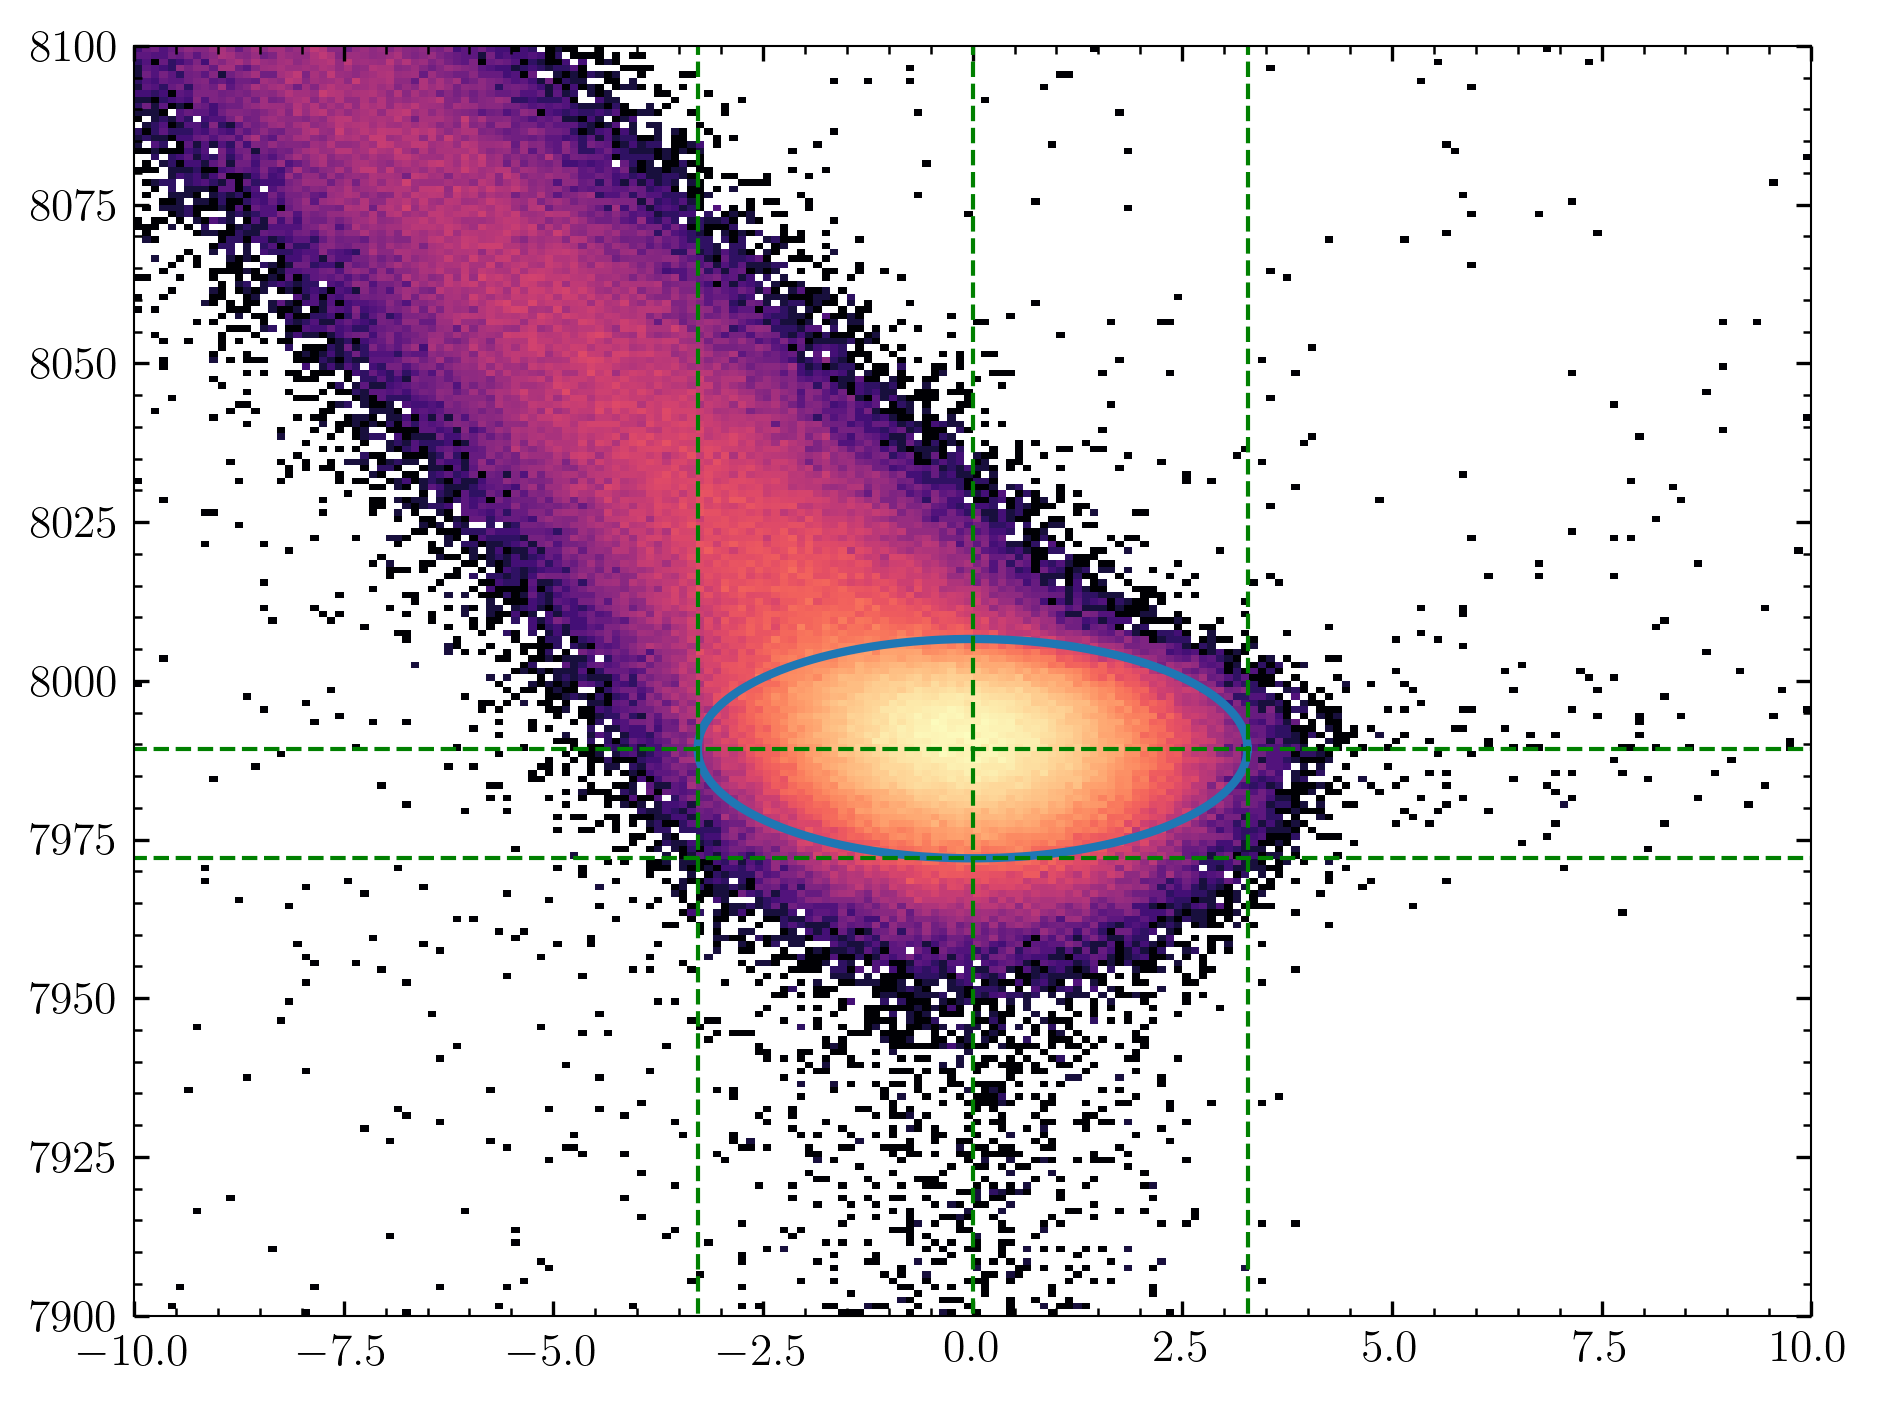

(-10.0, 10.0)

In [16]:
fontsize = 12
width = 6.9

fig, ax = plt.subplots()
plt.hist2d(icpc.slope_raw, icpc.offset_raw,bins = (-100:0.1:10, 7800:10000), norm=mpl.colors.LogNorm(), cmap = :magma)
#plt.hist2d(icpc.slope_raw[idxspr], icpc.offset_raw[idxspr],bins = (-100:0.1:10, 7800:10000), norm=mpl.colors.LogNorm(), cmap = :magma)
plt.plot(icpc_slope_cut*cos.(0:0.01:2π), (baseline - offcut)*sin.(0:0.01:2π) .+ baseline, lw = 2)
plt.hlines([baseline, offcut], -100,10, lw = 1, ls = "--", colors = :green)
plt.vlines([-icpc_slope_cut,0, icpc_slope_cut], 7800, 8500, lw = 1, ls = "--", colors = :green)
plt.ylim(7900,8100)
plt.xlim(-10,10)

In [17]:
is0hp = icpc_dco.n_hits .== 1
sum(is0hp)/length(icpc_dco)

0.9628154617941903

In [18]:
is0b = icpc_dco.im32 .< 2.26
sum(is0b)/length(icpc_dco)

0.9819418687131979

In [19]:
idxclean = findall(is0b .* is0spr .* is0hp)
length(idxclean)/length(icpc)

0.5580483886130364

In [20]:
idxclean_sp = findall(is0b .* isspr .* is0hp)
length(idxclean_sp)/length(icpc)

0.38266829614309766

In [21]:
ic = view(icpc, idxclean);
icdco = view(icpc_dco, idxclean);
cz = view(czt, idxclean)

icsp = view(icpc, idxclean_sp);
icdcosp = view(icpc_dco, idxclean_sp);
czsp = view(czt, idxclean_sp);

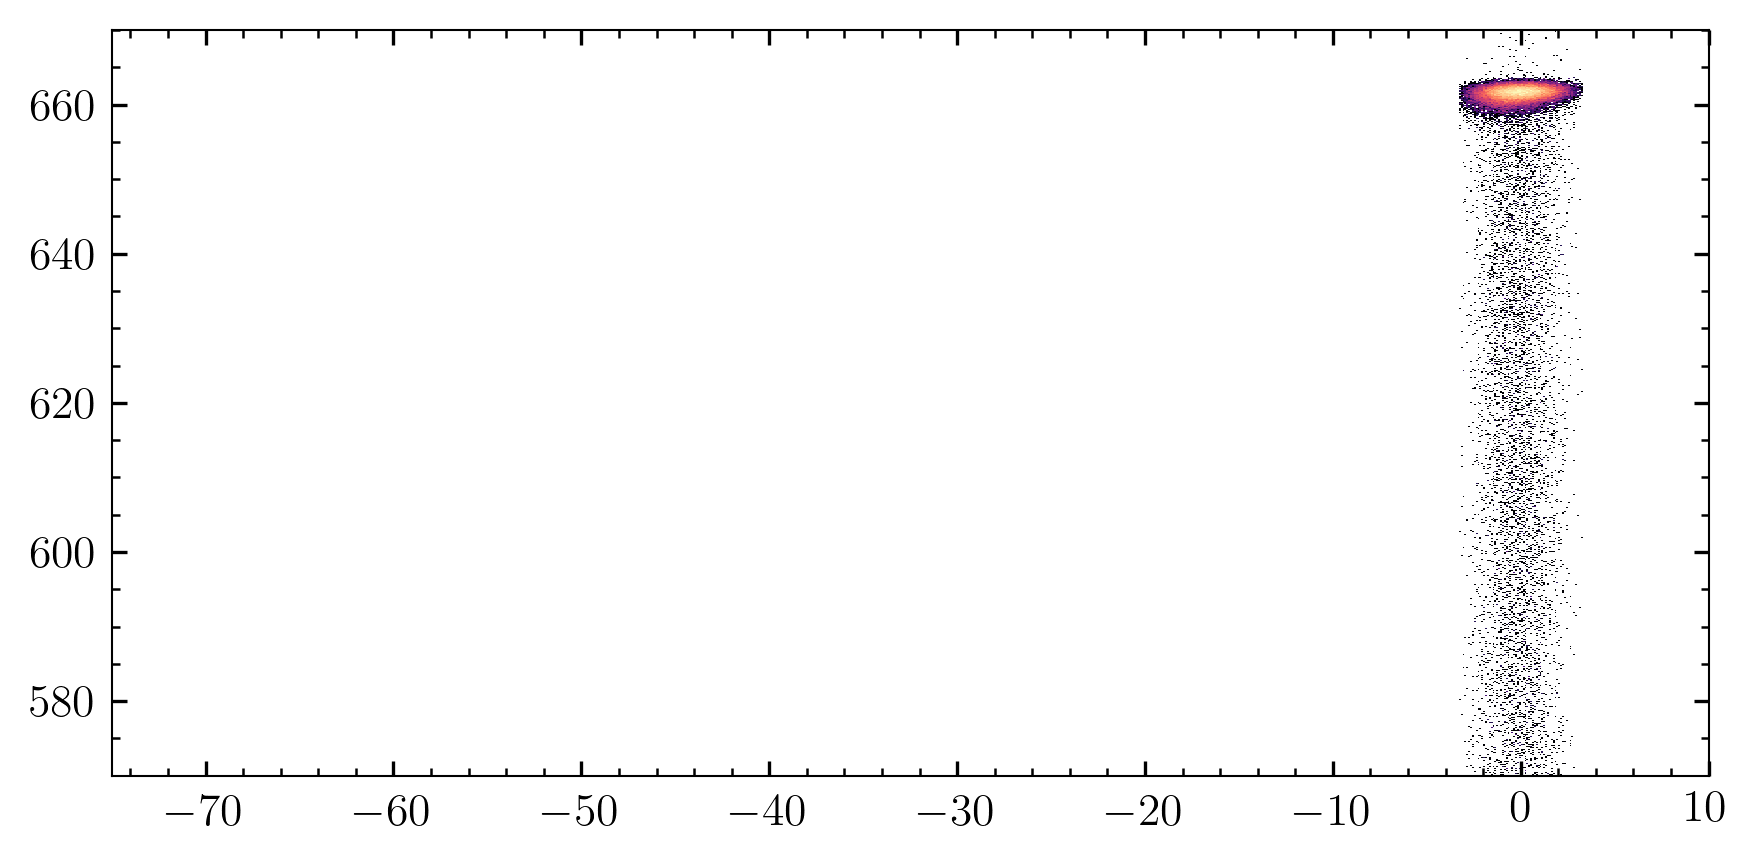

In [22]:
fontsize = 12
width = 6.9
fig, ax = plt.subplots()
plt.hist2d(ic.slope_raw, cal_energy.(ic.euncal),bins = (-75:0.1:10, 570:0.1:670), norm=mpl.colors.LogNorm(), cmap = :magma)
fig.set_size_inches(6,3)

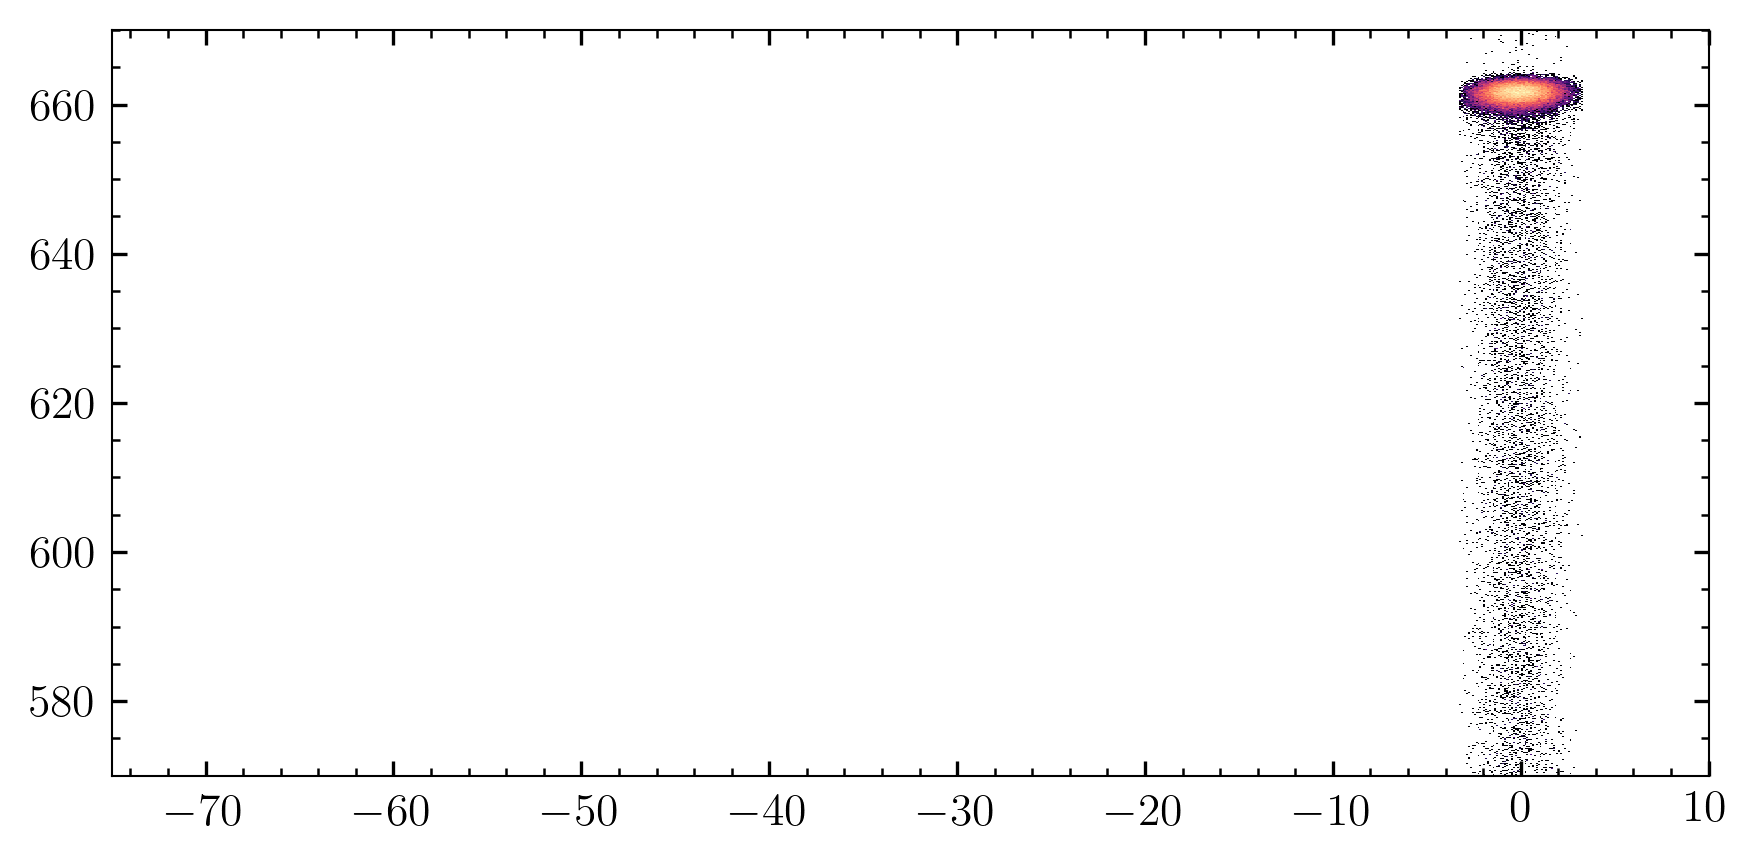

In [23]:
fontsize = 12
width = 6.9
fig, ax = plt.subplots()
plt.hist2d(icdco.slope_raw, cal_energy.(icdco.euncal),bins = (-75:0.1:10, 570:0.1:670), norm=mpl.colors.LogNorm(), cmap = :magma)
fig.set_size_inches(6,3)

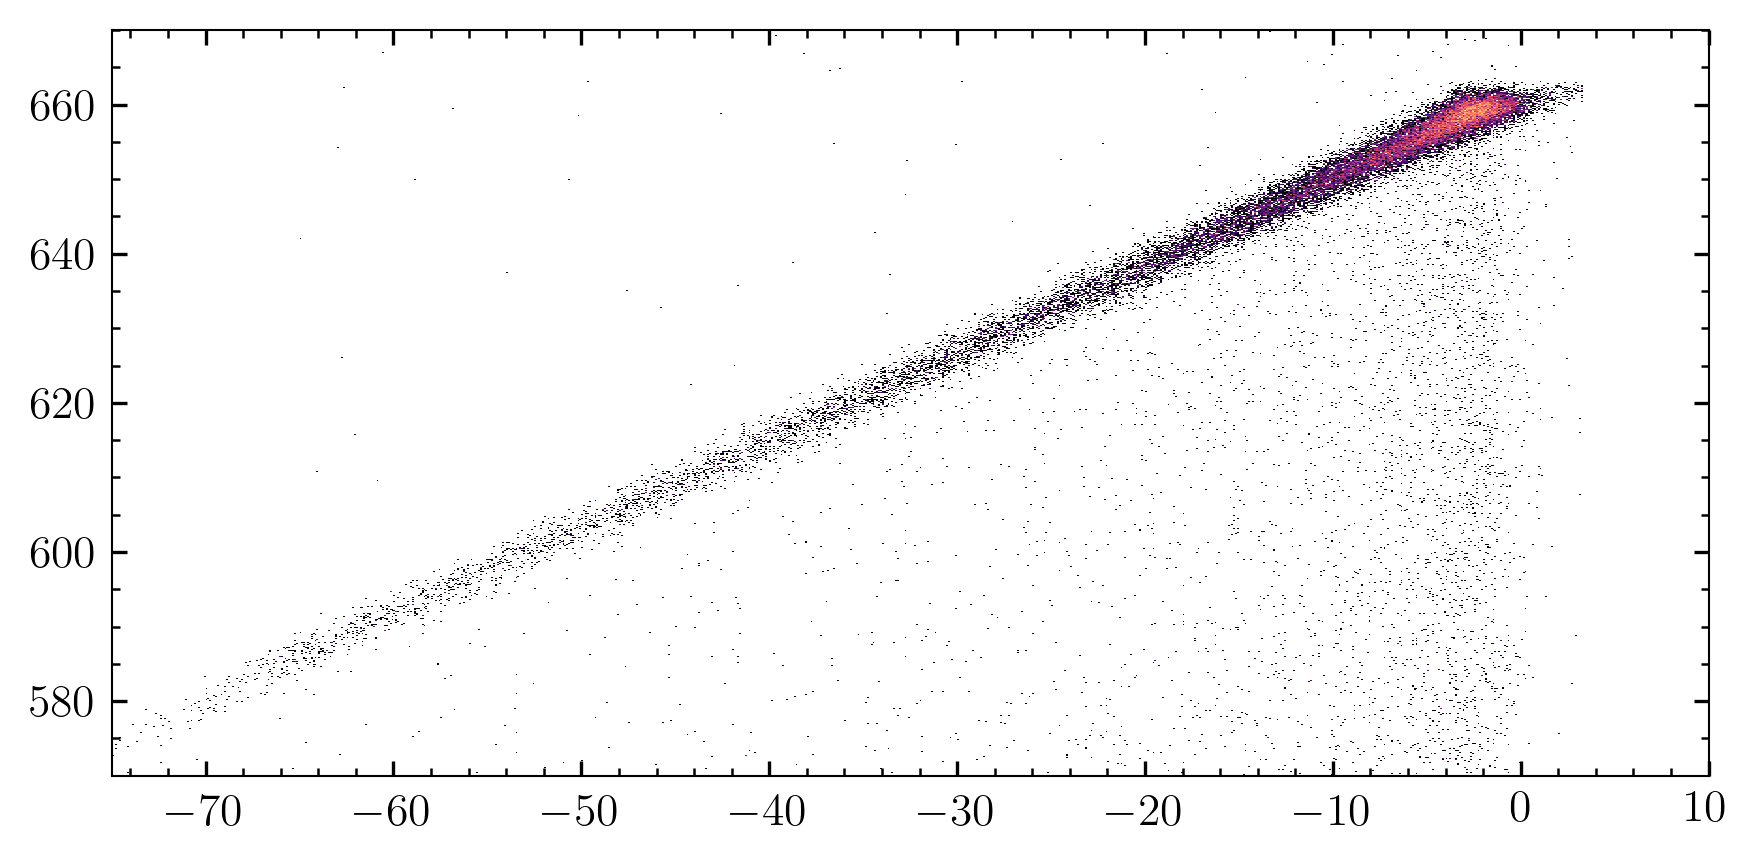

In [24]:
fig, ax = plt.subplots()
plt.hist2d(icsp.slope_raw, cal_energy.(icsp.euncal),bins = (-75:0.1:10, 570:0.1:670), norm=mpl.colors.LogNorm(), cmap = :magma)
fig.set_size_inches(6,3)

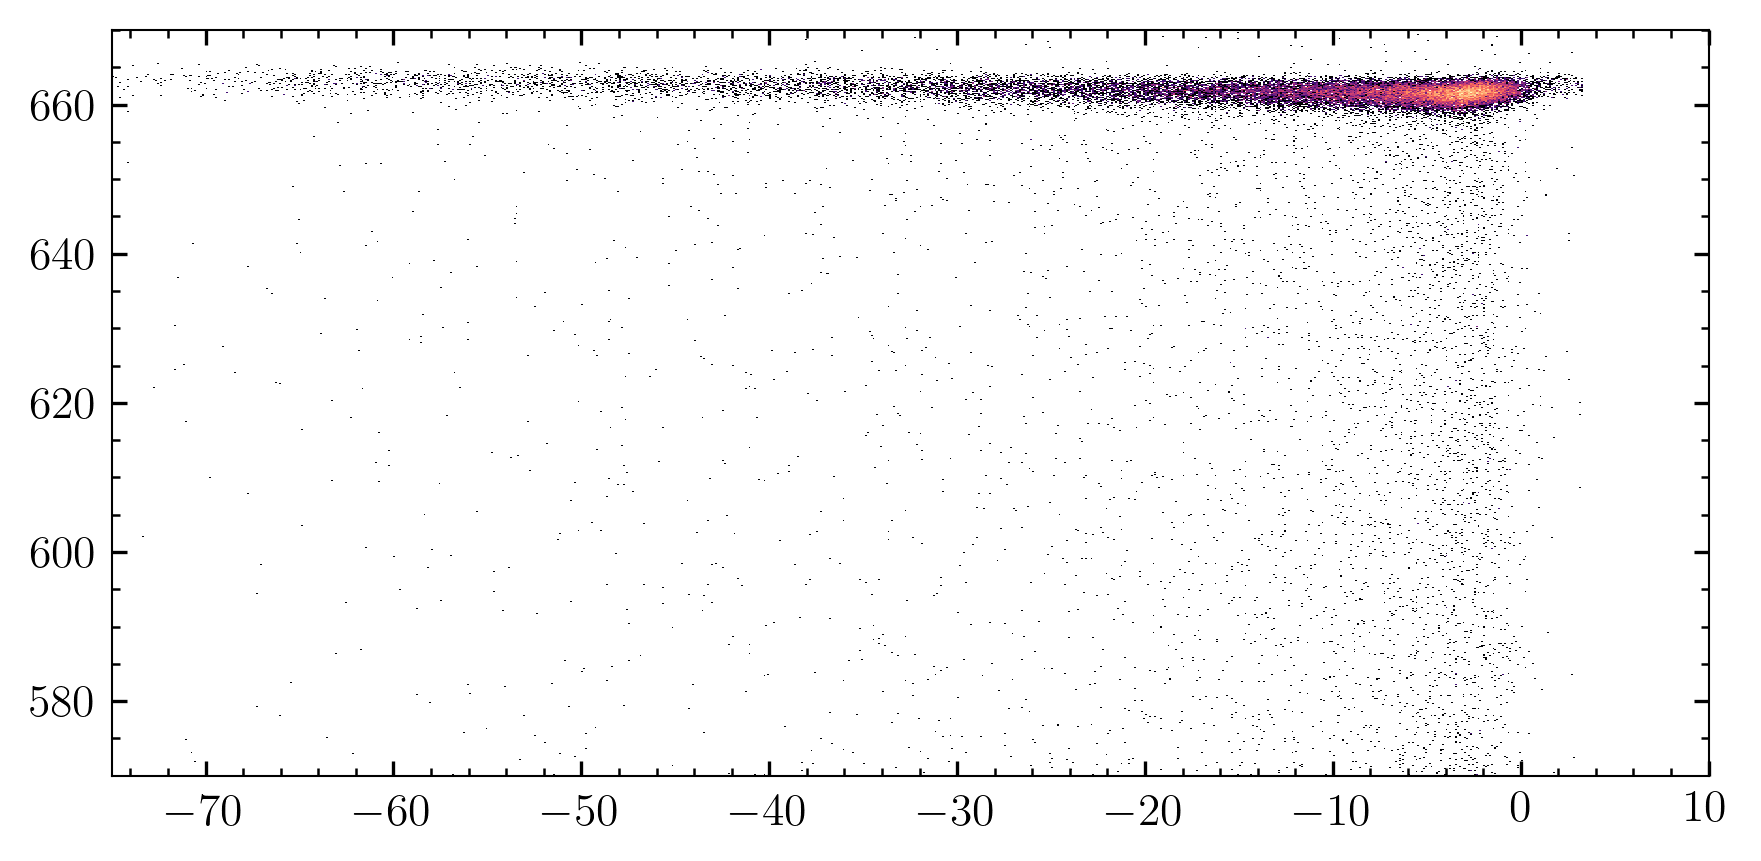

In [25]:
fig, ax = plt.subplots()
plt.hist2d(icdcosp.slope_raw, cal_energy.(icdcosp.euncal),bins = (-75:0.1:10, 570:0.1:670), norm=mpl.colors.LogNorm(), cmap = :magma)
fig.set_size_inches(6,3)

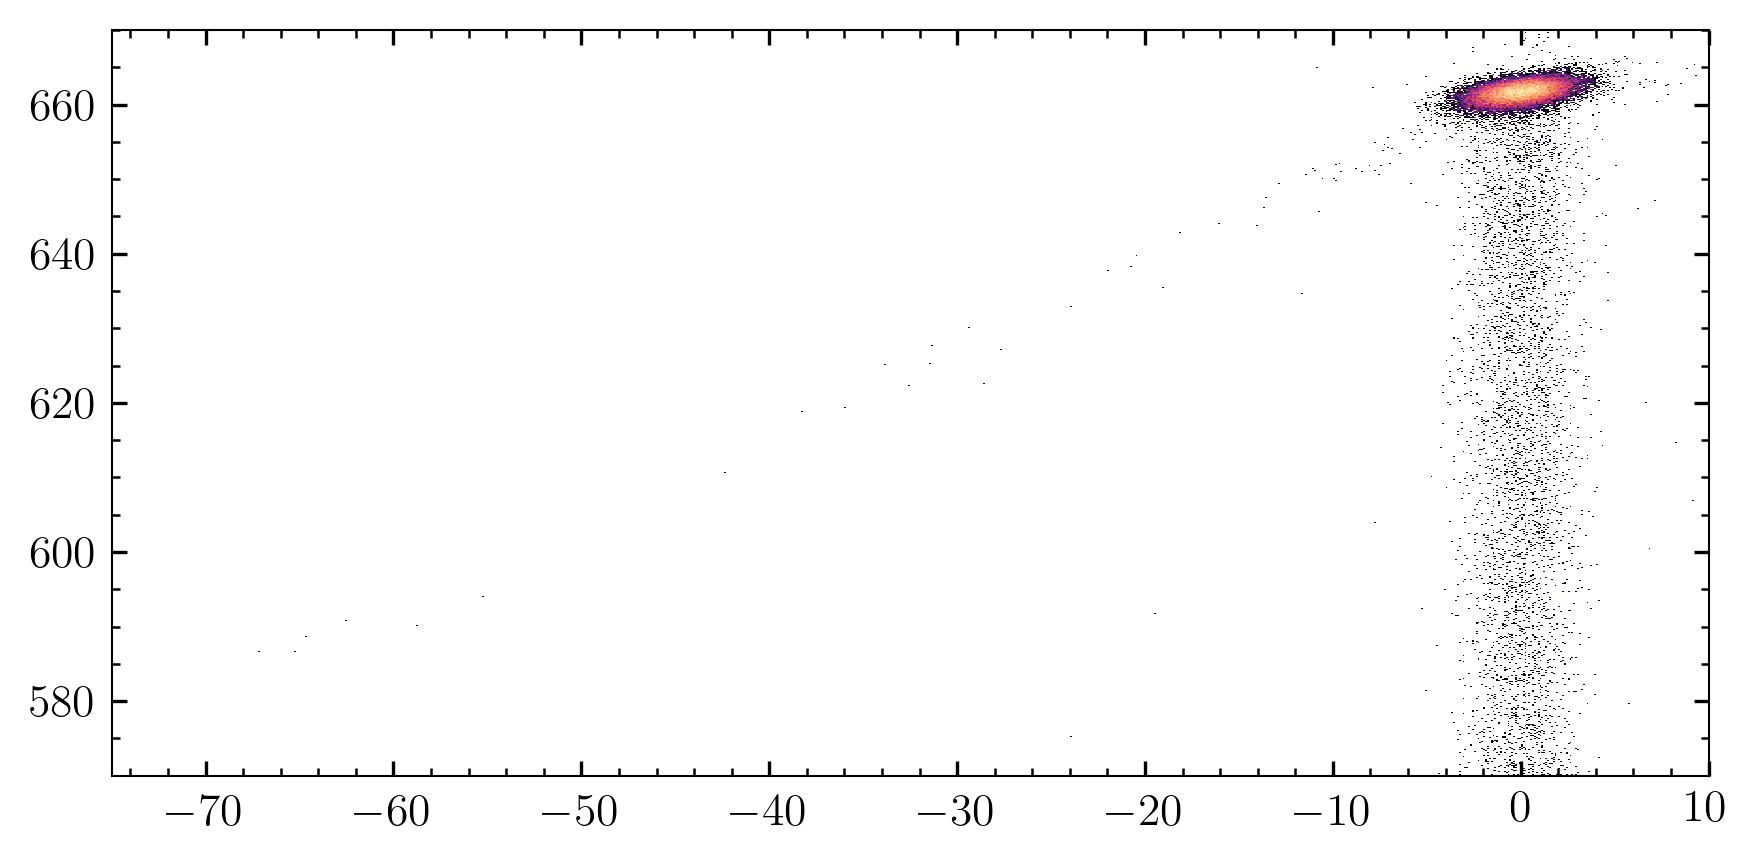

In [26]:
fig, ax = plt.subplots()
plt.hist2d(icdcosp.slope, cal_energy.(icdcosp.euncal),bins = (-75:0.1:10, 570:0.1:670), norm=mpl.colors.LogNorm(), cmap = :magma)
fig.set_size_inches(6,3)

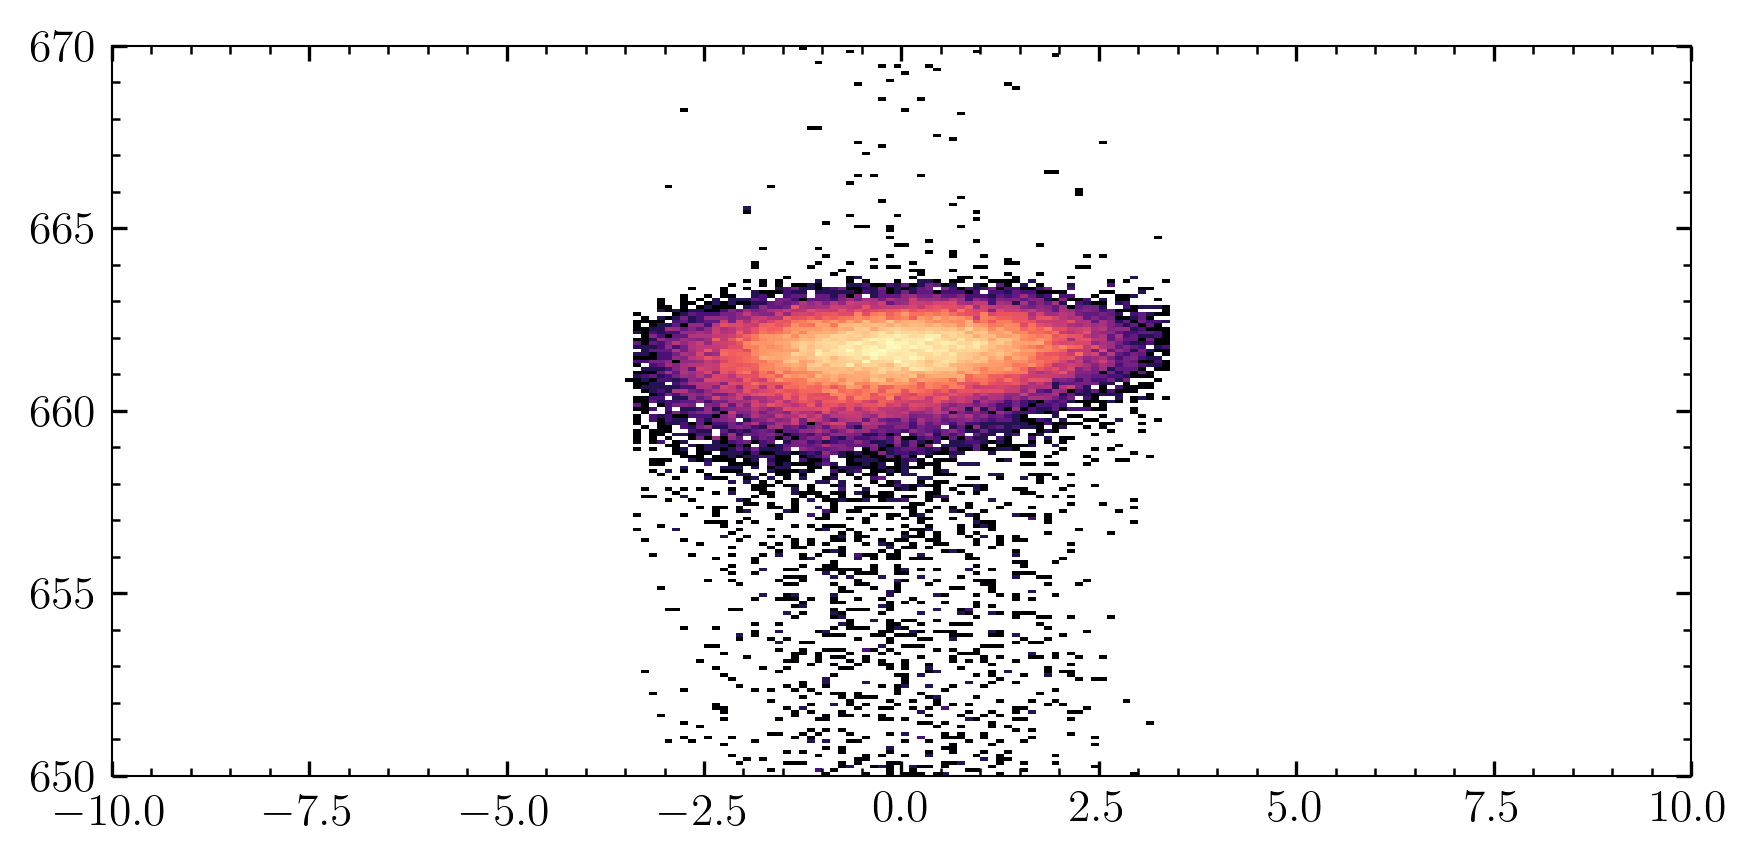

In [27]:
fig, ax = plt.subplots()
plt.hist2d(ic.slope, cal_energy.(ic.euncal),bins = (-10:0.1:10, 650:0.1:670), norm=mpl.colors.LogNorm(), cmap = :magma)
fig.set_size_inches(6,3)

In [28]:
step_e_bins = 0.1
e_bins = 640:step_e_bins:670;
fitfunc = energy_function_plus_erfc;

In [29]:
fwhm_dt = []
fwhm_fit_dt = []
convs_dt = []
μs_fit_dt = []
γs_dt = []
tailamps_dt = []
max_h_dt = []
#tau_ct = collect(700:10:1000)
dtcoeff = collect(-45:-40)
X = []
Y = []

Xfit = []
Yfit = []

fit_e = true
fit_e_param = []

for dc in dtcoeff
    edt = cosd(dc)*(cal_energy.(icsp.euncal).-661.66)  + sind(dc)*icsp.slope_raw .+ 661.66
    
    ht = fit(Histogram, edt, e_bins)
    xt = collect(ht.edges[1])[1:end-1] .+ step_e_bins/2
        yt = ht.weights/(sum(ht.weights)*step_e_bins)
        push!(max_h_dt, maximum(ht.weights))
    
    if fit_e
        efitdt = curve_fit(fitfunc, xt, yt, [0.7, 1.0, 661.0, 2.0, 0.0, 0.01], 
                lower = [0.01, 0.0, 600.0, 0.0, 0.0, 0.0], upper = [1.0,6.0, 670.0, 100.0, 1.0, 0.1])
        x = collect(e_bins[1]:0.001:e_bins[end])
        
        y = fitfunc(x, efitdt.param)
        push!(fwhm_fit_dt, FWHM(x, y))
        push!(convs_dt, efitdt.converged)
        push!(μs_fit_dt, efitdt.param[3])
        push!(γs_dt, efitdt.param[4])
        push!(tailamps_dt, efitdt.param[5])
        push!(fit_e_param, efitdt.param)
        push!(Xfit, x)
        push!(Yfit, y)
    end
    
    push!(X, xt)
    push!(Y, yt)
end

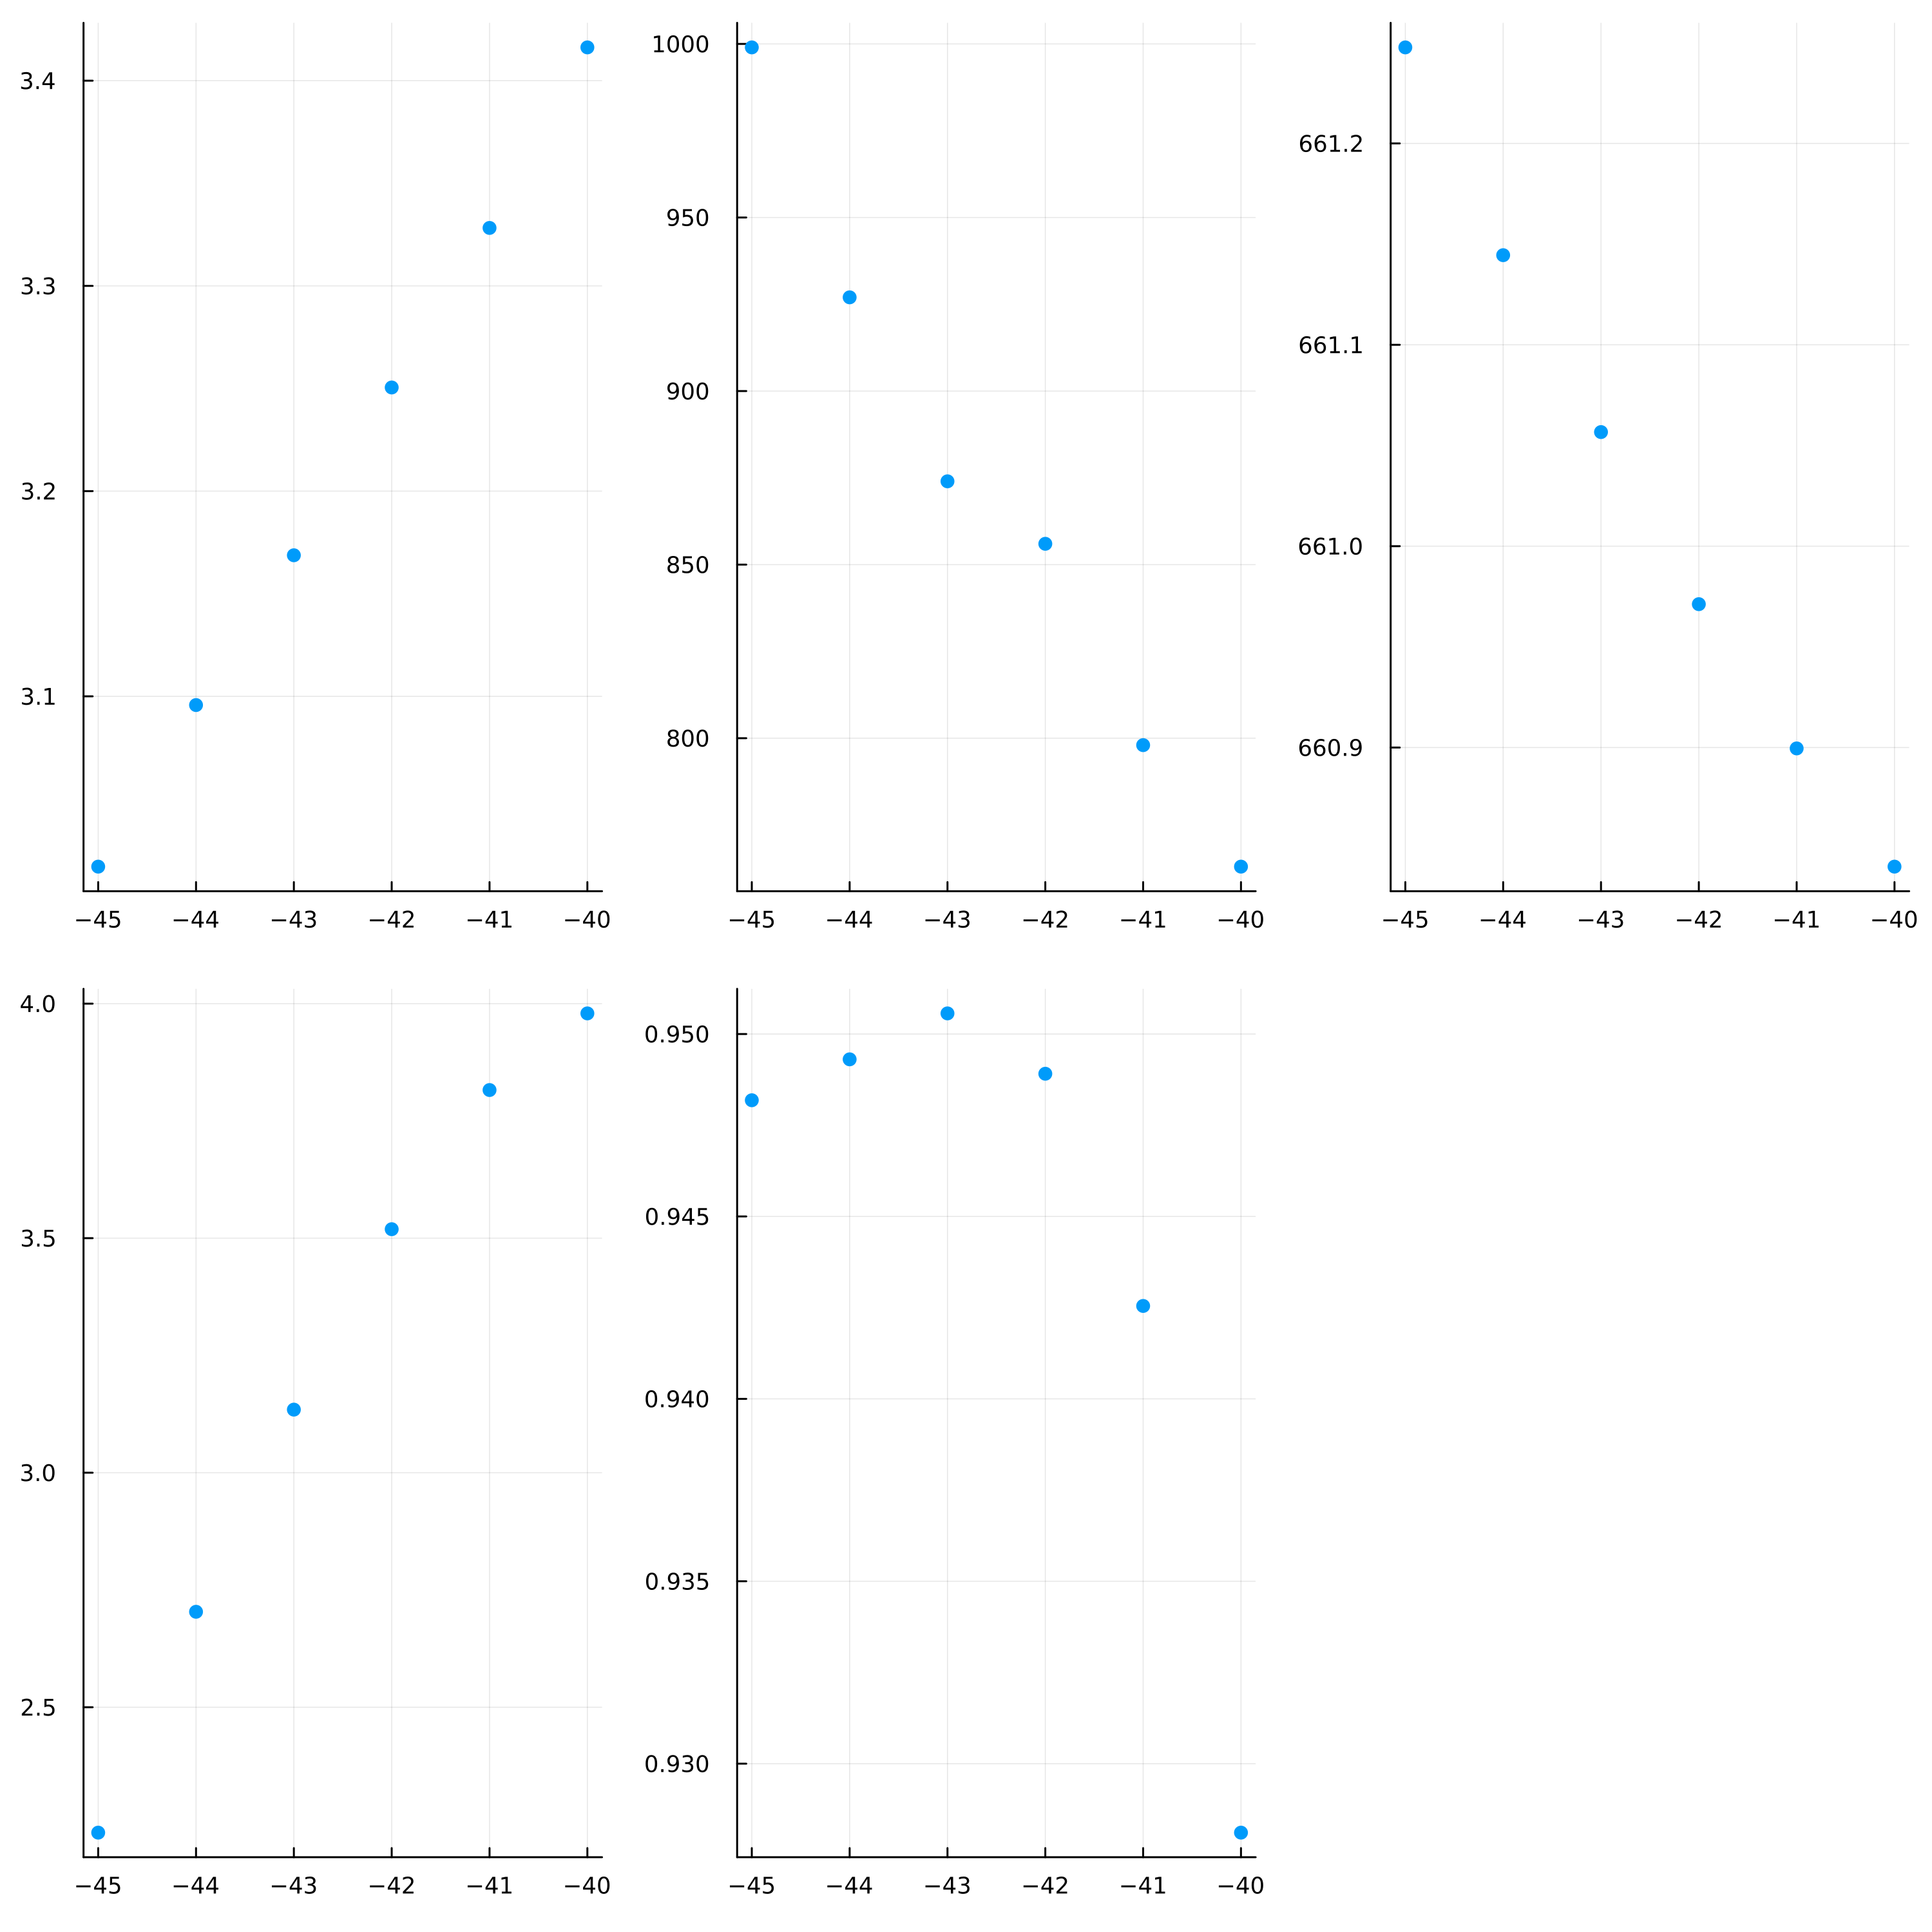

In [30]:
plot(scatter(dtcoeff, fwhm_fit_dt), 
    scatter(dtcoeff, max_h_dt), 
    scatter(dtcoeff, μs_fit_dt),
    scatter(dtcoeff, γs_dt),
    scatter(dtcoeff, tailamps_dt), 
    layout = (2,3), size = (1000,1000))

In [55]:
fwhm_dt = []
fwhm_fit_dt = []
convs_dt = []
μs_fit_dt = []
γs_dt = []
tailamps_dt = []
max_h_dt = []
#tau_ct = collect(700:10:1000)
dtcoeff = collect(0:0.01:0.7)
X = []
Y = []

Xfit = []
Yfit = []

fit_e = true
fit_e_param = []

for dc in dtcoeff
    edt = cal_energy.(icdcosp.euncal - dc*icdcosp.slope)
    #edt = cosd(dc)*(cal_energy.(icdcosp.euncal).-661.66)  + sind(dc)*icdcosp.slope .+ 661.66
    
    ht = fit(Histogram, edt, e_bins)
    xt = collect(ht.edges[1])[1:end-1] .+ step_e_bins/2
        yt = ht.weights/(sum(ht.weights)*step_e_bins)
        push!(max_h_dt, maximum(ht.weights))
    
    if fit_e
        efitdt = curve_fit(fitfunc, xt, yt, [0.7, 1.0, 661.0, 2.0, 0.0, 0.01], 
                lower = [0.01, 0.0, 600.0, 0.0, 0.0, 0.0], upper = [1.0,6.0, 670.0, 100.0, 1.0, 0.1])
        x = collect(e_bins[1]:0.001:e_bins[end])
        
        y = fitfunc(x, efitdt.param)
        push!(fwhm_fit_dt, FWHM(x, y))
        push!(convs_dt, efitdt.converged)
        push!(μs_fit_dt, efitdt.param[3])
        push!(γs_dt, efitdt.param[4])
        push!(tailamps_dt, efitdt.param[5])
        push!(fit_e_param, efitdt.param)
        push!(Xfit, x)
        push!(Yfit, y)
    end
    
    push!(X, xt)
    push!(Y, yt)
end

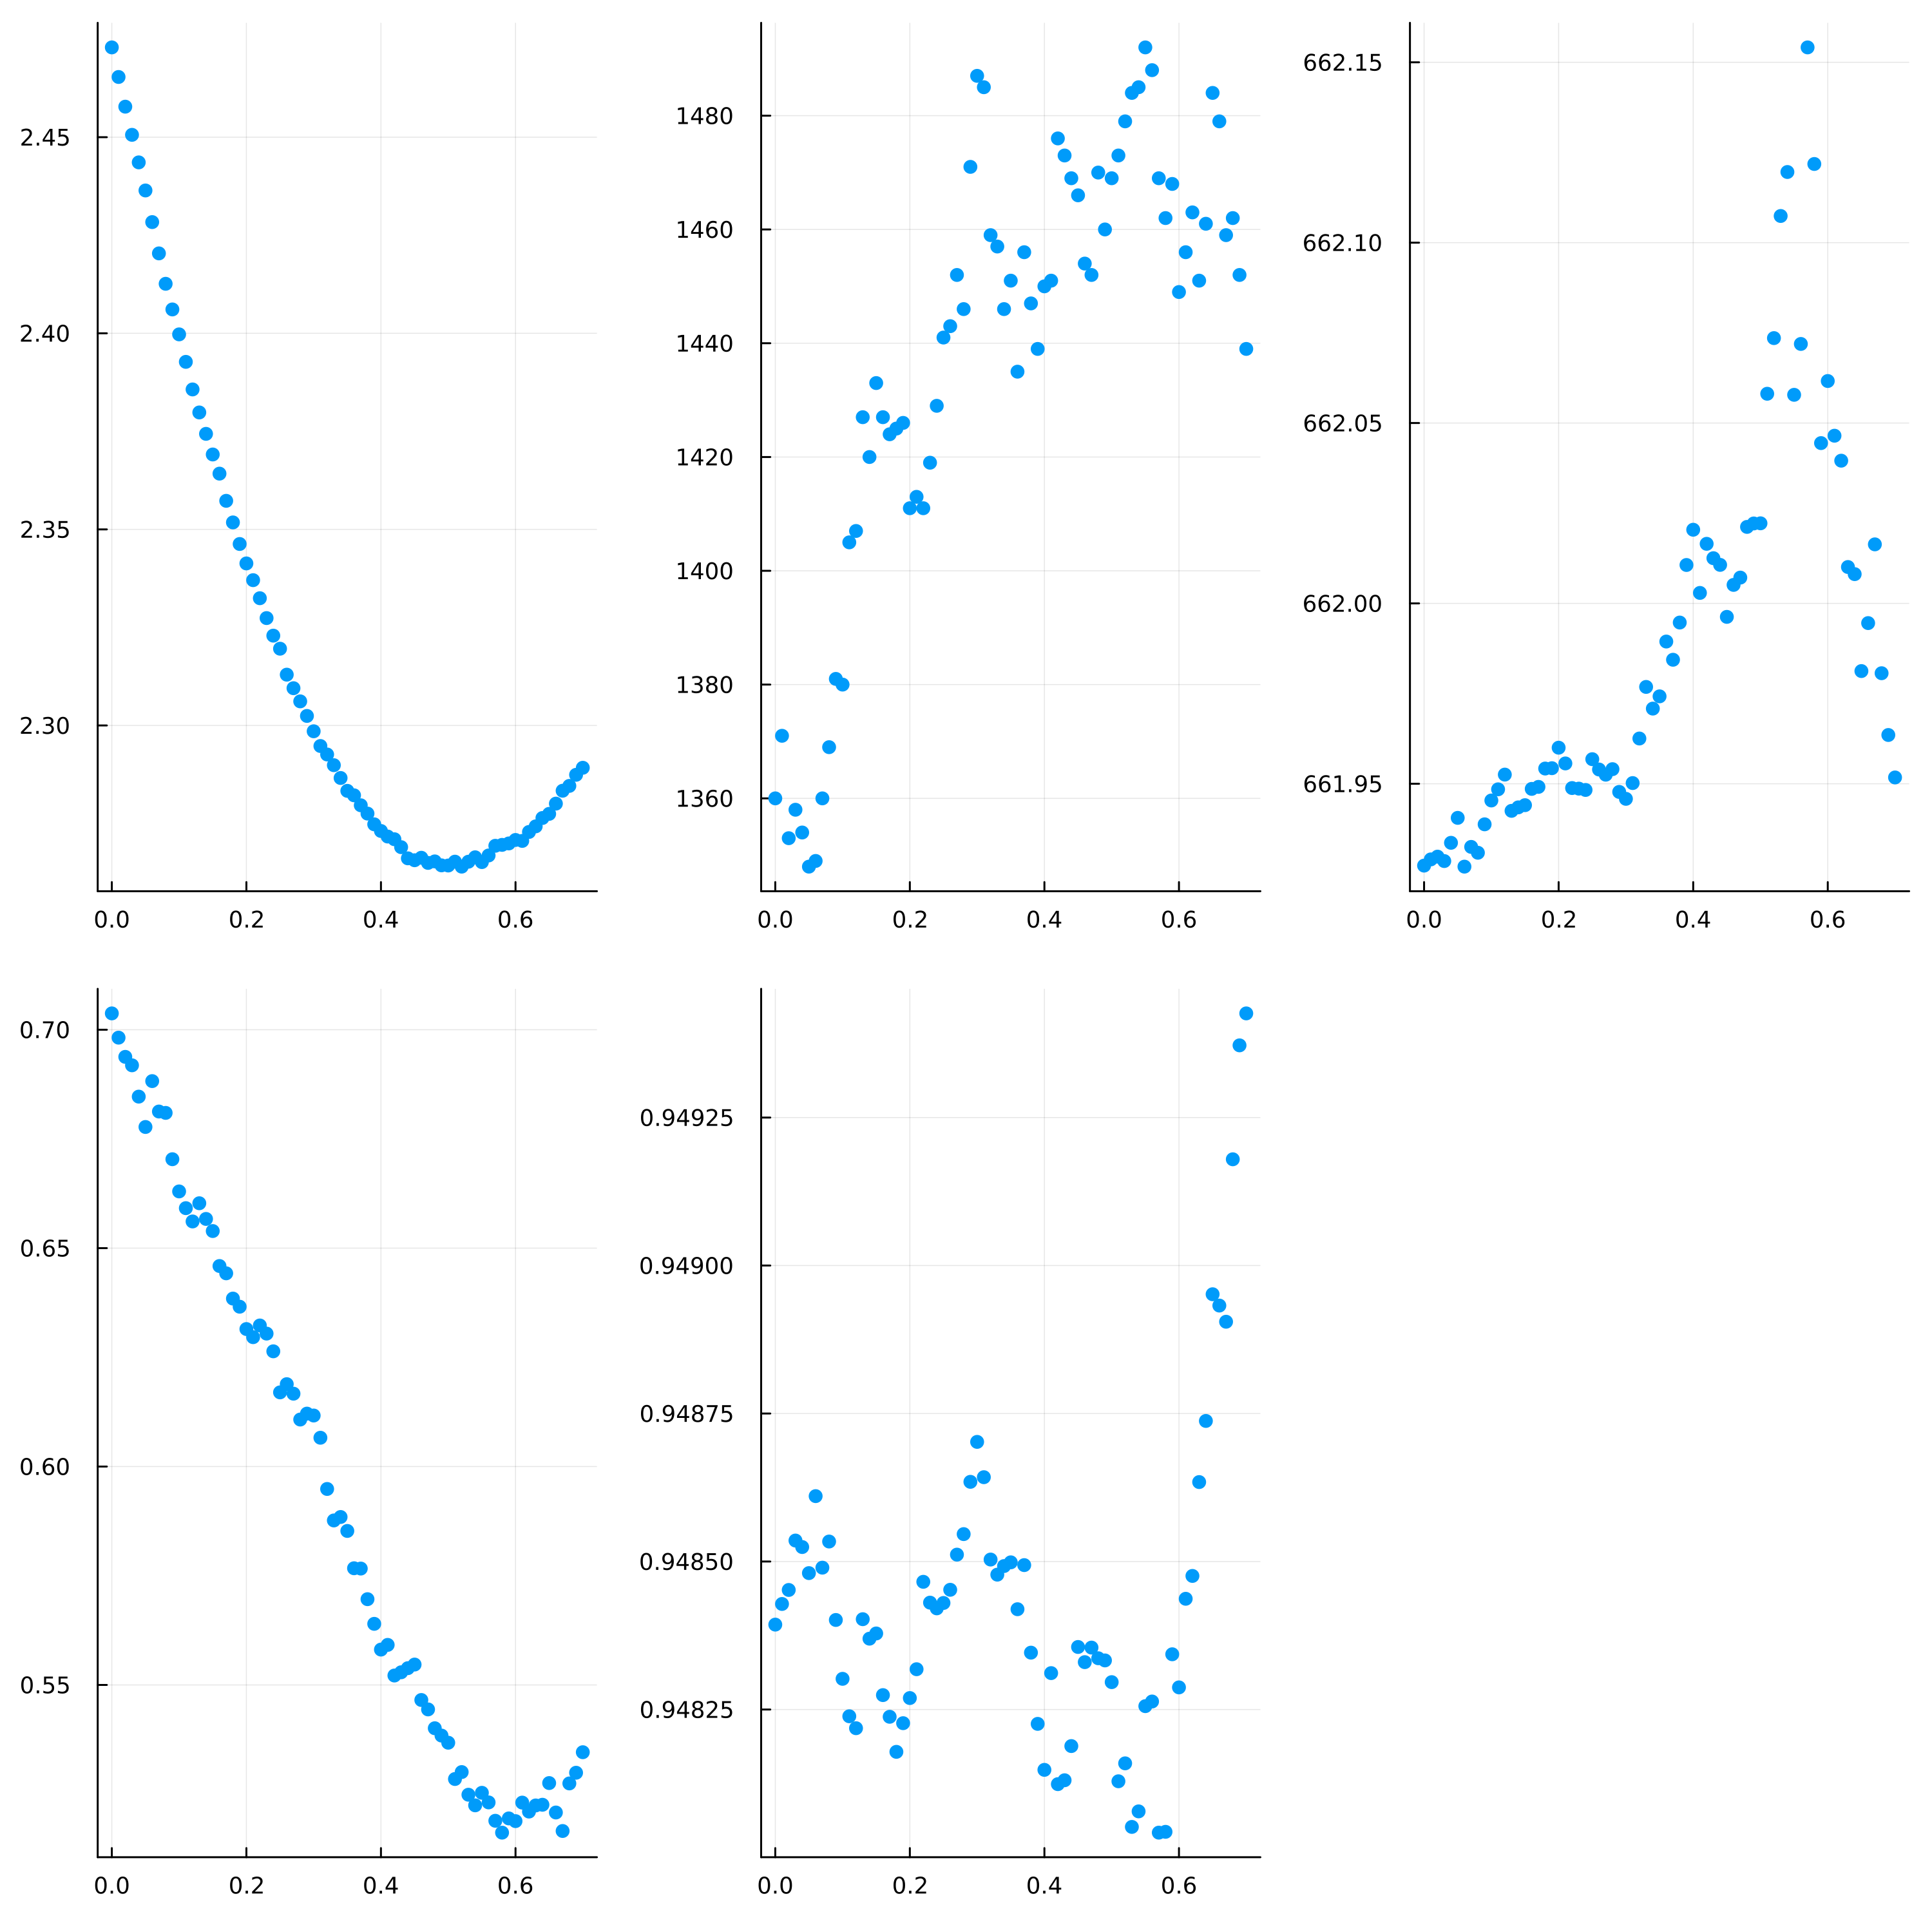

In [56]:
plot(scatter(dtcoeff, fwhm_fit_dt), 
    scatter(dtcoeff, max_h_dt), 
    scatter(dtcoeff, μs_fit_dt),
    scatter(dtcoeff, γs_dt),
    scatter(dtcoeff, tailamps_dt), 
    layout = (2,3), size = (1000,1000))

In [42]:
rscorr = 0.58#dtcoeff[argmin(fwhm_fit_dt)]

0.58

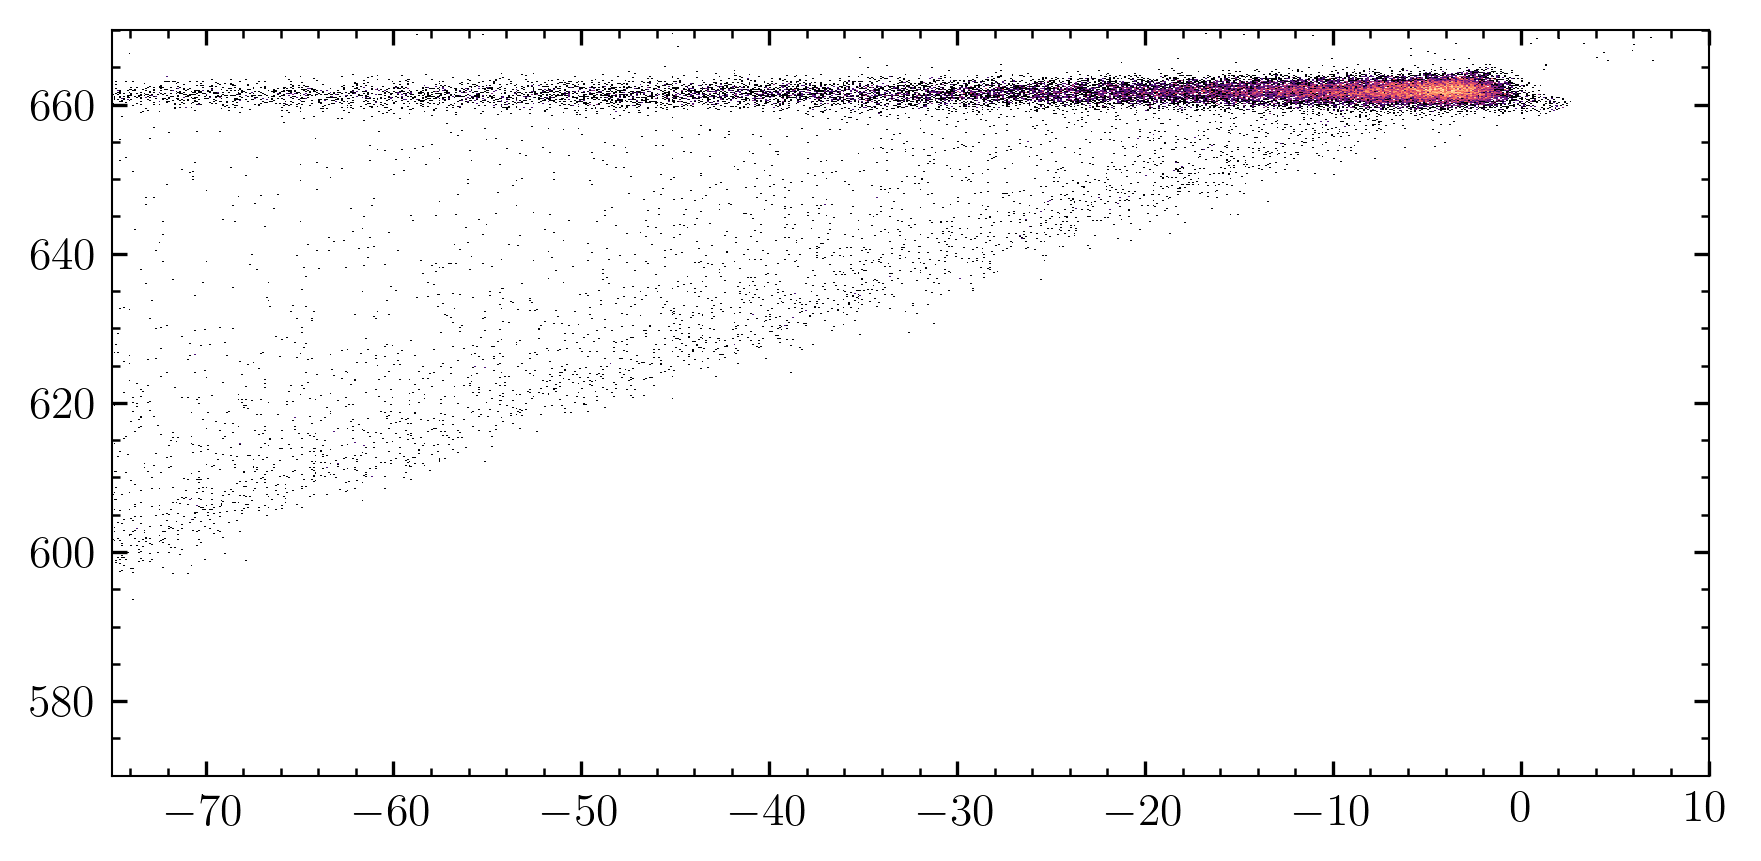

In [43]:
θ = -49
ecorr = cosd(θ)*(cal_energy.(icsp.euncal).-662) + sind(θ)*icsp.slope_raw .+ 662
slpcorr = -sind(θ)*(cal_energy.(icsp.euncal).-662) + cosd(θ)*icsp.slope_raw

fig, ax = plt.subplots()
plt.hist2d(slpcorr, ecorr,bins = (-75:0.1:10, 570:0.1:670), 
    norm=mpl.colors.LogNorm(), cmap = :magma)
fig.set_size_inches(6,3)

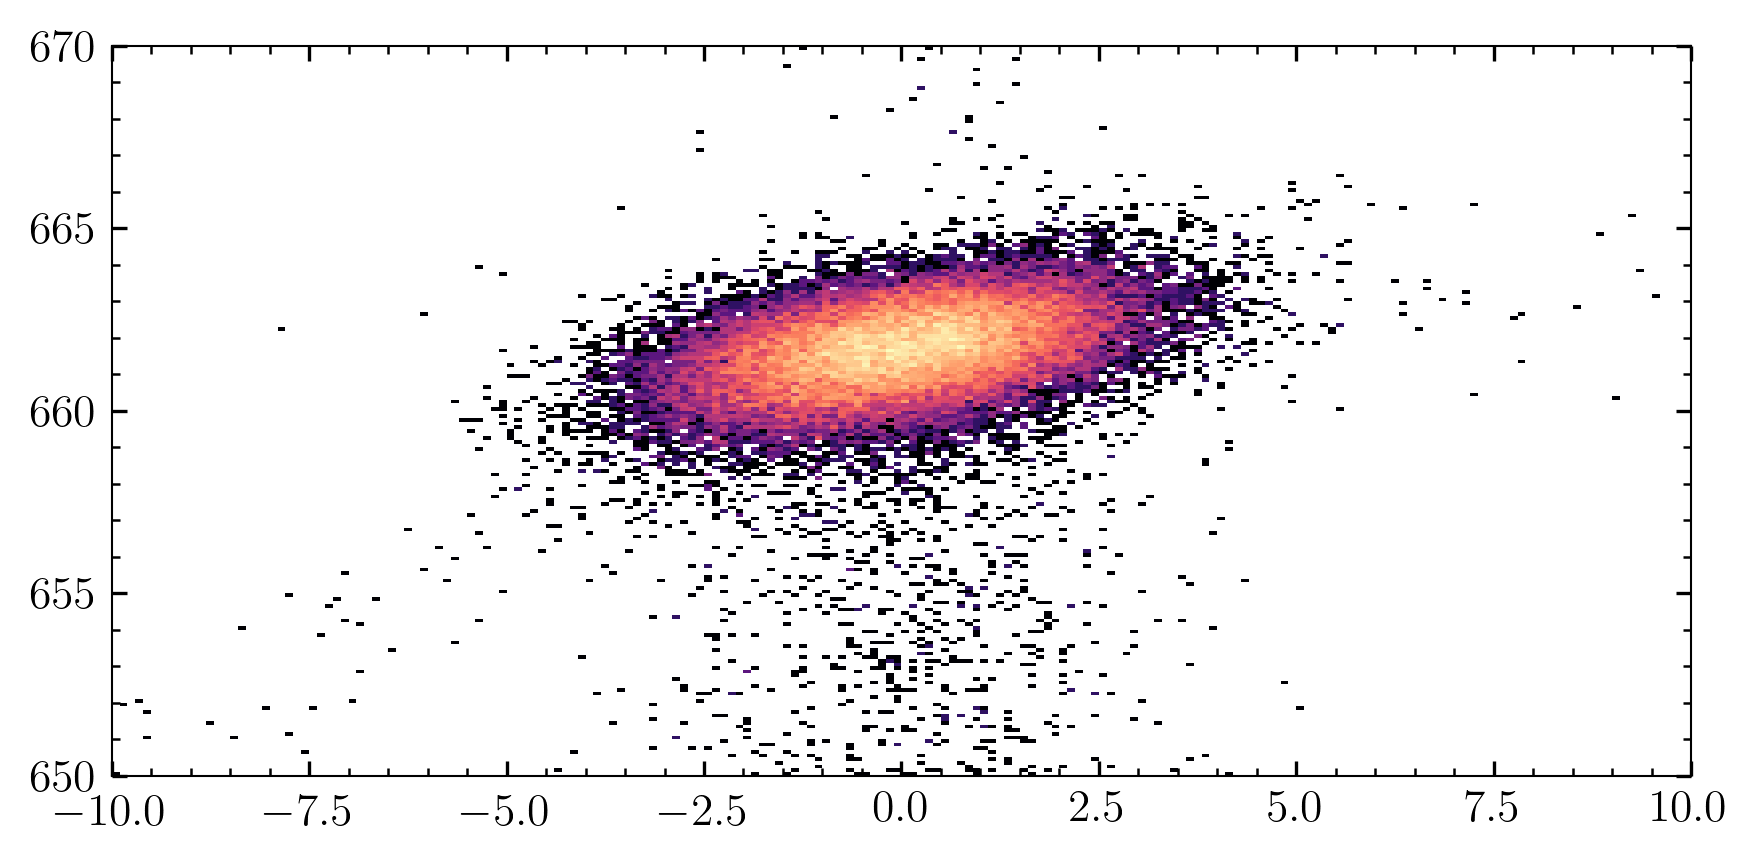

In [44]:
fig, ax = plt.subplots()
plt.hist2d(icdcosp.slope, cal_energy.(icdcosp.euncal),bins = (-10:0.1:10, 650:0.1:670), 
    norm=mpl.colors.LogNorm(), cmap = :magma)
fig.set_size_inches(6,3)

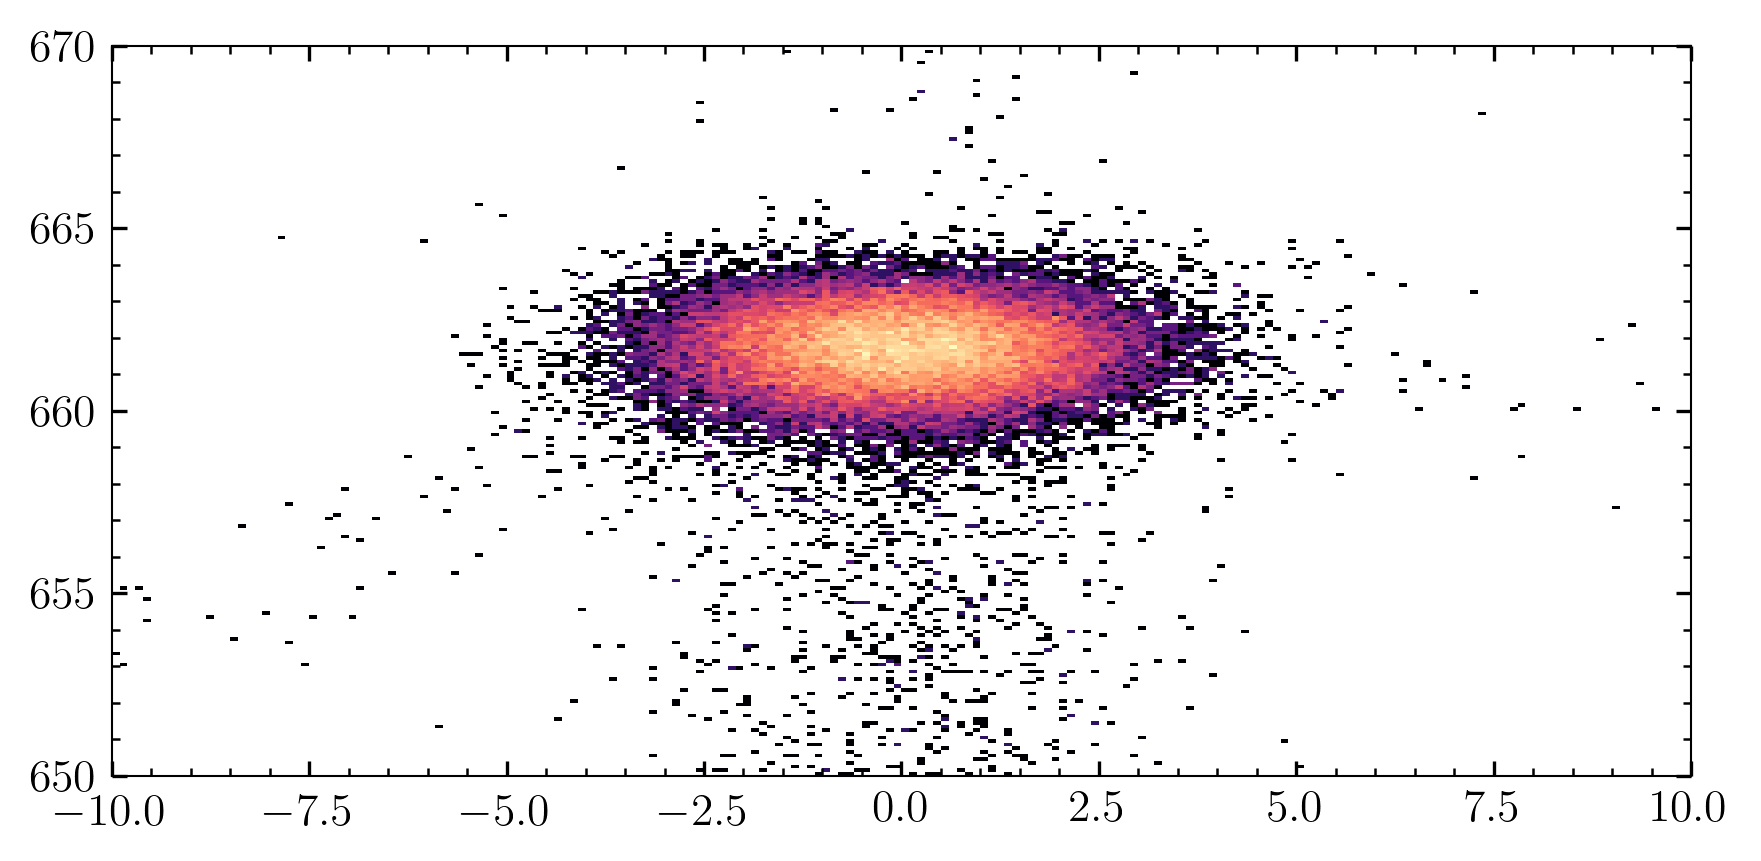

In [58]:
ecorrdco2 = cal_energy.(icdcosp.euncal- 0.58*icdcosp.slope)
#slpcorrdco = -sind(θ)*(cal_energy.(icdcosp.euncal).-661.66) + cosd(θ)*icdcosp.slope

fig, ax = plt.subplots()
plt.hist2d(icdcosp.slope, ecorrdco2,bins = (-10:0.1:10, 650:0.1:670), 
    norm=mpl.colors.LogNorm(), cmap = :magma)
fig.set_size_inches(6,3)

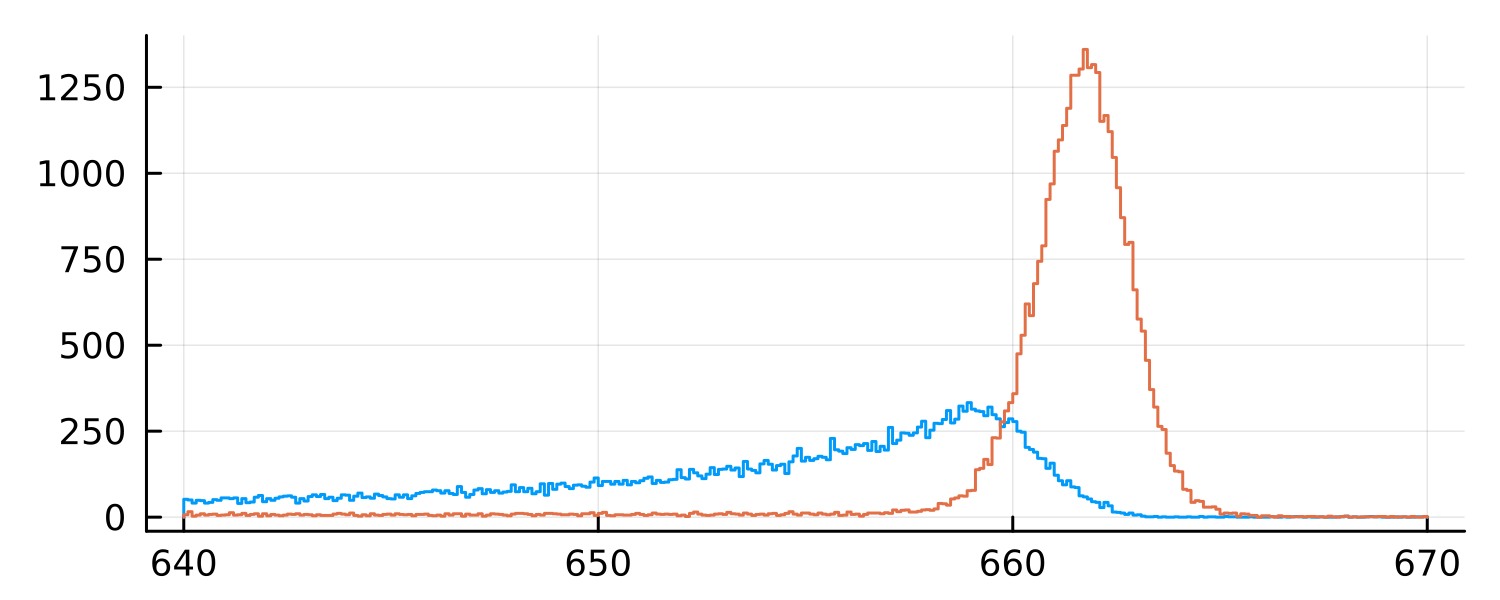

In [46]:
stephist(cal_energy.(icsp.euncal), bins = e_bins)
stephist!(cal_energy.(icdcosp.euncal), bins = e_bins)

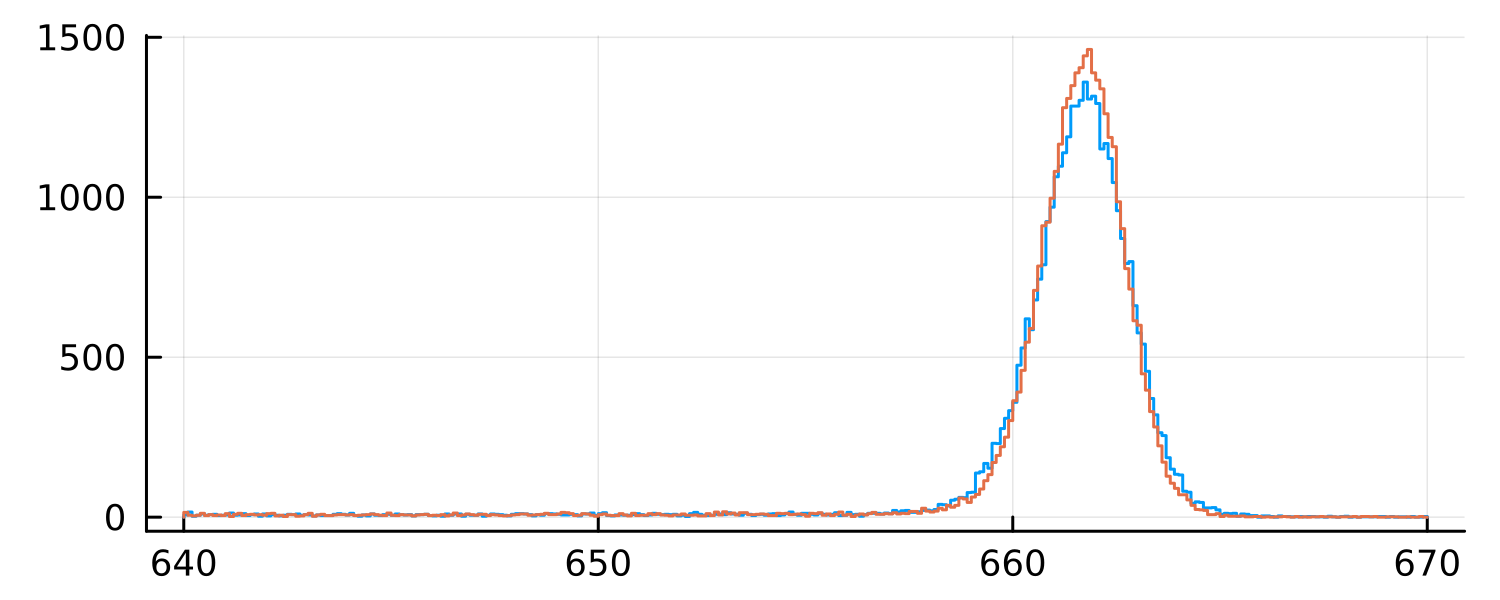

In [47]:
stephist(cal_energy.(icdcosp.euncal), bins = e_bins)
#stephist!(ecorrdco, bins = e_bins)
stephist!(ecorrdco2, bins = e_bins)
#stephist!(cal_energy.(ic.euncal), bins = e_bins)

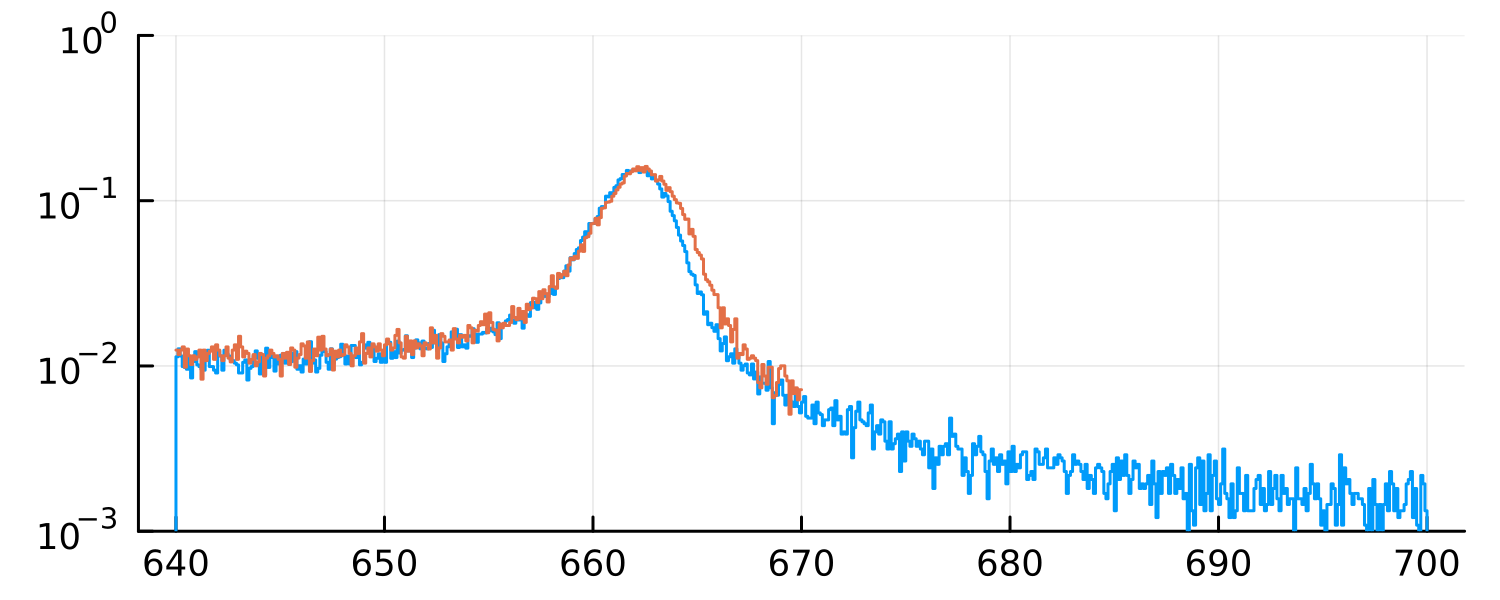

In [48]:
stephist(cal_energy.(ic.euncal) + ustrip(sum.(cz.hit_edep))/1000, bins = 640:0.1:700, normalize = true, yscale = :log10, ylims = (1e-3,1))
#stephist(cal_energy.(icdcosp.euncal) + ustrip(sum.(czsp.hit_edep))/1000, bins = e_bins)
stephist!(ecorrdco2 + ustrip(sum.(czsp.hit_edep))/1000, bins = e_bins, normalize = true)

In [49]:
h = fit(Histogram, cal_energy.(ic.euncal), e_bins)
x = collect(h.edges[1])[1:end-1] .+ step_e_bins/2
normfactor = sum(h.weights*step_e_bins)
y = h.weights/normfactor;
erfcoffset = mean(y[1:10])
efit = curve_fit(fitfunc, x, y, [0.9, 1.0, 662.0, 1.0, 0.0, erfcoffset], 
        lower = [0.1, 0.0, 600.0,0.01, 0.0, 0.8*erfcoffset], upper = [1.0,6.0, 670.0, 100.0, 1.0, 1.2*erfcoffset])
efit.param

6-element Vector{Float64}:
   0.3921304219063289
   0.5465846851590289
 661.9079139363179
   0.6916015618685698
   0.9561665500800879
   0.0018650065459490436

In [50]:
xs = collect(e_bins[1]:0.001:e_bins[end])
yfit = normfactor*fitfunc(xs, efit.param);

In [51]:
FWHM(xs, yfit, verbose = true)

Crossings(660.8811545692703, 662.4293187534238), Fraction-max(1478.3689685765087,)

1.5481641841535065

In [379]:
FWHM(xs, yfit, verbose = true)

Crossings(660.4302292046165, 662.1558964850213), Fraction-max(1452.230435197424,)

1.7256672804048776

In [52]:
h_sp = fit(Histogram, ecorrdco2, e_bins)
#h_sp = fit(Histogram,cal_energy.(icdcosp.euncal), e_bins)
normfactor_sp = sum(h_sp.weights*step_e_bins)
y_sp = h_sp.weights/normfactor_sp;
erfcoffset_sp = mean(y_sp[1:10])
efit_sp = curve_fit(gaussian_plus_erfc, x, y_sp, [0.9, 1.0, 662.0, erfcoffset_sp], 
        lower = [0.1, 0.0, 600.0, 0.8*erfcoffset_sp], upper = [1.0,6.0, 670.0, 1.2*erfcoffset_sp])
efit_sp.param

4-element Vector{Float64}:
   0.9401562176196524
   0.971155673123651
 661.7246480314968
   0.0023758509397629572

In [53]:
yfit_sp = normfactor*gaussian_plus_erfc(xs, efit_sp.param);

In [54]:
FWHM(xs, yfit_sp, verbose = true)

Crossings(660.574783433234, 662.866772878012), Fraction-max(1049.168095845425,)

2.2919894447779825

In [383]:
FWHM(xs, yfit_sp, verbose = true)

Crossings(660.1572686478801, 662.7355824078645), Fraction-max(1024.0069265287475,)

2.5783137599844395

In [286]:
1125*4

4500

In [287]:
875*4

3500

In [188]:
t0eg = icpc_dco.t0[1];

In [190]:
icsamples;

In [198]:
etrappars = [1125,875,1125]
energy_trap = TrapezoidalChargeFilter(etrappars...)
etrap_offset = sum(etrappars) - 1;

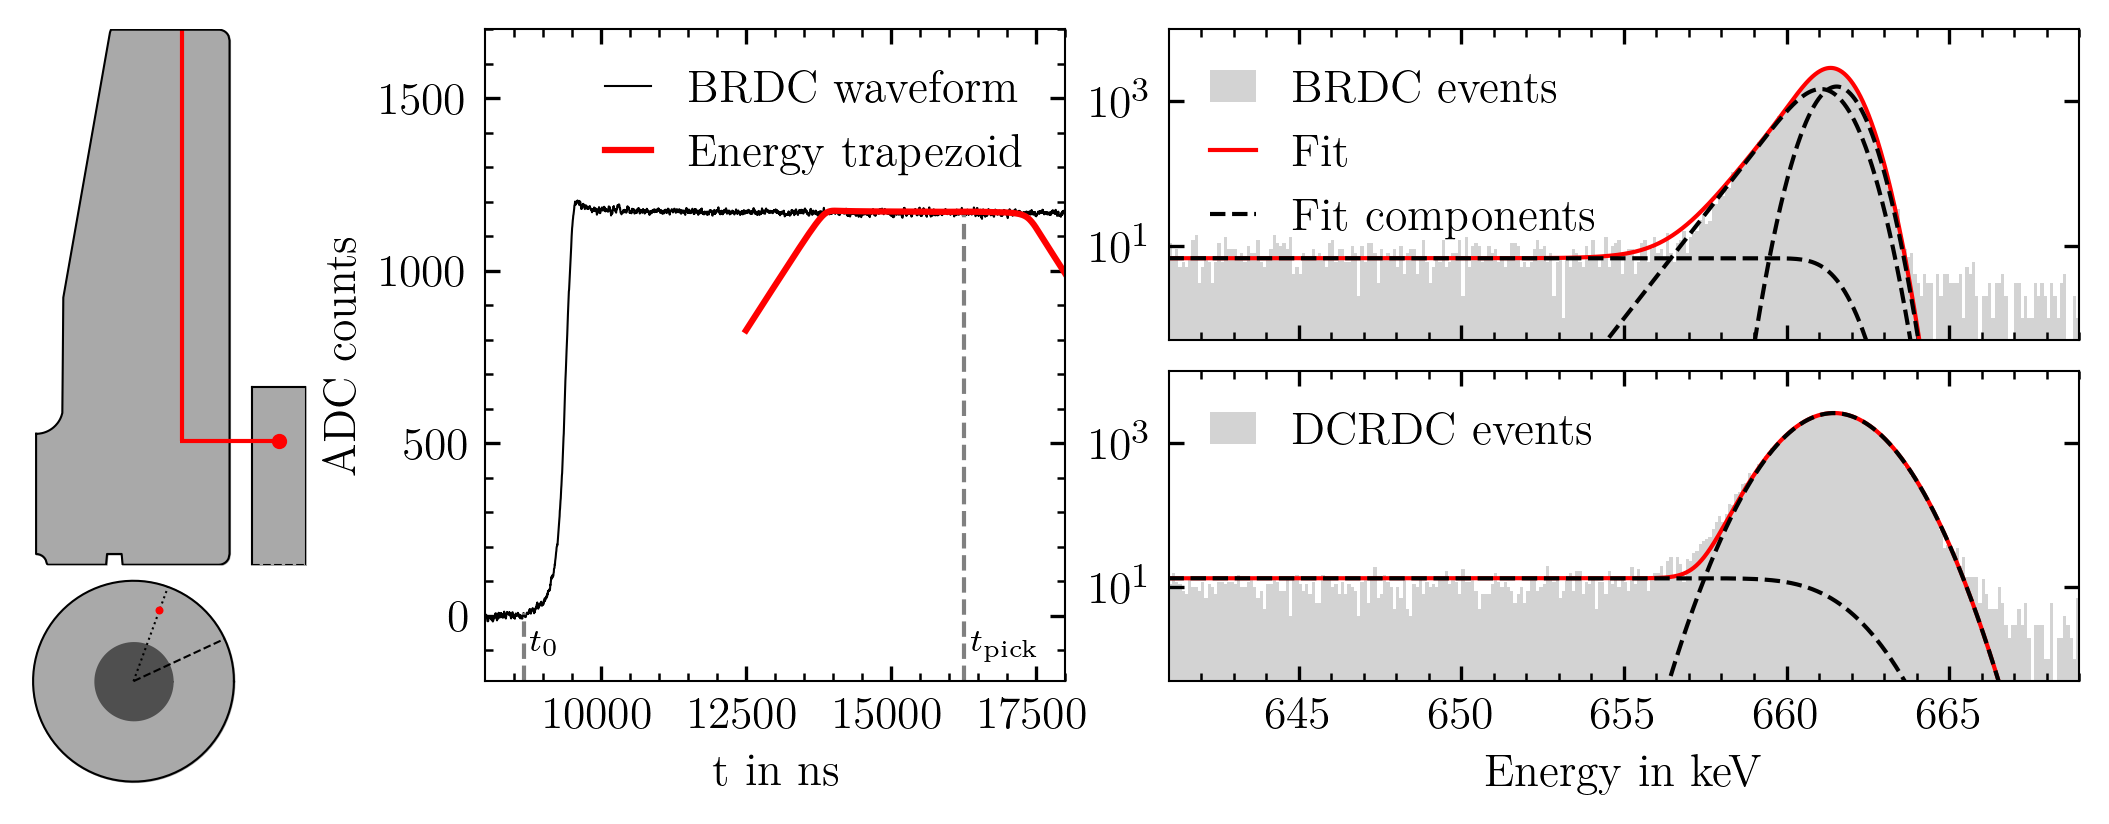

In [ ]:
fontsize = 12
width = 6.9

fig = plt.figure()
gs = fig.add_gridspec(2, 1,
                      left=0.55, right=0.99, bottom=0.15, top=0.99,
                      wspace=0.4, hspace = 0.1)
ax = fig.add_subplot(gs[1, 0])
ax.hist(cal_energy.(ic.euncal), bins = e_bins, color = :lightgrey, label = "BRDC events")
ax.plot(xs, normfactor*fitfunc(xs, efit.param), color = :red, label = "Fit", lw = 1)
ax.plot(xs, normfactor*efit.param[5]*efit.param[1]*gaussian(xs, efit.param[2:3]), color = :black, ls = "--", label = "Fit components", lw = 1)
ax.plot(xs, normfactor*erfc_background(xs, efit.param[[2,3,6]]), color = :black, ls = "--", lw = 1)
ax.plot(xs, normfactor*efit.param[5]*(1-efit.param[1])*tail_lowE(xs, efit.param[2:4]), color = :black, ls = "--", lw = 1)
ax.tick_params(axis="x", labelbottom=false)
#ax.vlines(lnfills, 7960, 8010, colors = :red, alpha = 0.2, linewidths = 1, label = L"LN$_2$"*"\nFill")
#ax.set_ylim(7960, 8010)
#ax.set_ylabel(L"$DC$ in ADC")
ax.set_ylim(0.5,1e4)
ax.set_yscale("log")
ax.set_xlim(e_bins[1]+1, e_bins[end]-1)


ax2 = fig.add_subplot(gs[0, 0], sharex=ax)
ax2.hist(cal_energy.(icdcosp.euncal), bins = e_bins, color = :lightgrey, label = "DCRDC events")
ax2.plot(xs, normfactor_sp*gaussian_plus_erfc(xs, efit_sp.param), color = :red, lw = 1)
ax2.plot(xs, normfactor_sp*efit_sp.param[1]*gaussian(xs, efit_sp.param[2:3]), color = :black, ls = "--", lw = 1)
ax2.plot(xs, normfactor_sp*erfc_background(xs, efit_sp.param[[2,3,4]]), color = :black, ls = "--", lw = 1)
#ax2.hist(ecorrdco2, bins = e_bins, color = :red, histtype = :step)
#ax2.set_xticks(tdisp,tlabels)
#ax2.set_xlabel("Date in MM/DD")
#ax2.set_ylabel(L"$\Delta B_{o_\text{crit}}$ in ADC", labelpad = 14)
#ax2.vlines(lnfills, 8, 26, colors = :red, alpha = 0.2, linewidths = 1)
ax2.set_ylim(0.5,1e4)
ax2.set_yscale("log")
ax2.set_xlim(e_bins[1]+1, e_bins[end]-1)
ax2.set_xlabel("Energy in keV")

t0egi = Int(floor(t0eg))
ftpoi = t0egi + sum(etrappars[1:2]) - 100
ax0 = fig.add_axes((0.22, 0.15, 0.28, 0.84))
ax0.plot(collect(8000:4:20000), icsamples[1][2000:end], c = :black, label ="BRDC waveform")
ax0.plot(collect(4*etrap_offset:4:4*5000-4), energy_trap(icsamples[1]), 
    lw = 1.5, c = :red, label = "Energy trapezoid")
ax0.vlines([4*t0egi, 4*ftpoi],-190, 
    [icsamples[1][t0egi], icsamples[1][ftpoi]], linestyles = "--", colors = :grey, lw = 1)
ax0.set_ylabel("ADC counts")
ax0.set_xlabel("t in ns")
ax0.annotate(L"t_0", (4*t0egi+100, -100), fontsize = 8)
ax0.annotate(L"t_\text{pick}", (4*ftpoi+100, -100), fontsize = 8)
ax0.set_xlim(8000, 18000)
ax0.set_ylim(-190, 1700)

axd = fig.add_axes((0.0, 0.3, 0.135, 0.69))
pyplot_icpc_czt(axd, 82-55, 25)

axd2 = fig.add_axes((0.0, 0.0, 0.1, 0.3), projection = "polar")
pyplot_icpc_top_view(axd2, [82-55], [69.9])

ax.legend(loc = "upper left")
ax2.legend(loc = "upper left")
ax0.legend(loc = "upper right")

fig.set_size_inches(width, 1.5*width/4)

fig.savefig("Cs_energy_calculation.png", dpi = 500, transparent = false)
fig.savefig("Cs_energy_calculation.pdf")

sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


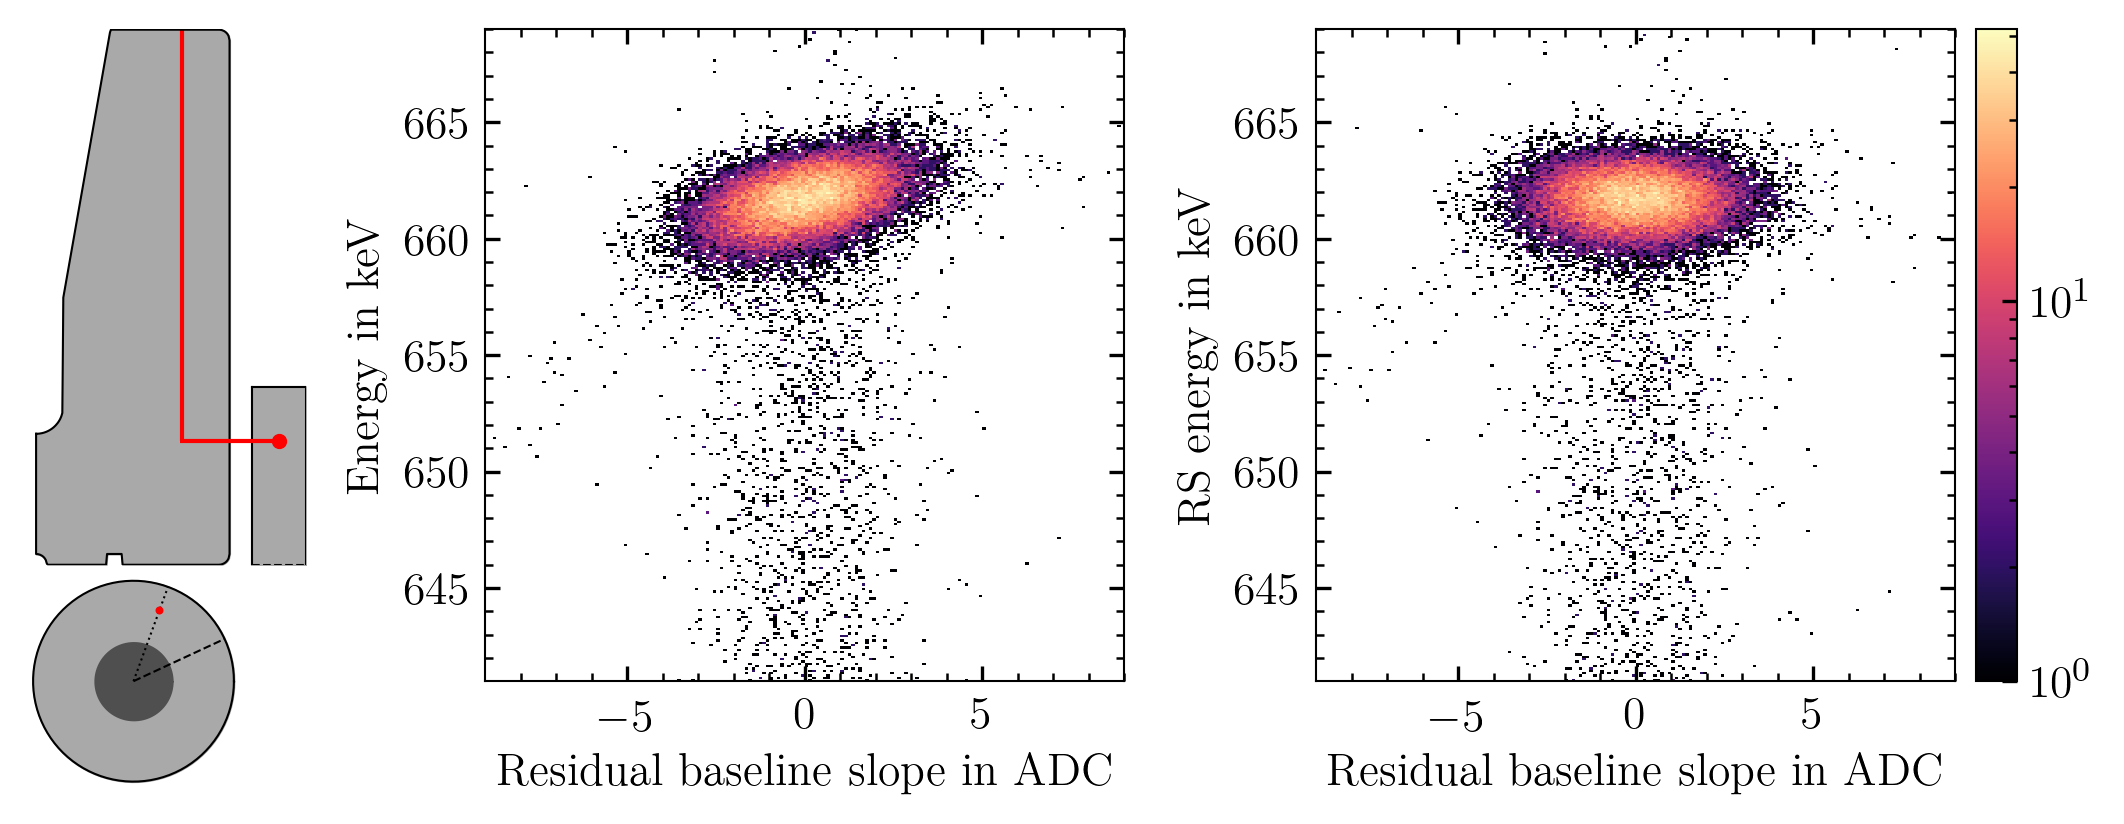

In [61]:
fontsize = 12
width = 6.9

fig = plt.figure()
gs = fig.add_gridspec(1, 2,  width_ratios=(1, 1),
                      left=0.22, right=0.93, bottom=0.15, top=0.99,
                      wspace=0.3)
ax = fig.add_subplot(gs[0, 1])

plt.hist2d(icdcosp.slope, cal_energy.(icdcosp.euncal), bins = (-9:0.1:9, 641:0.1:669), 
    norm=mpl.colors.LogNorm(), cmap = :magma)

ax.set_ylabel("Energy in keV")
ax.set_xlabel("Residual baseline slope in ADC")

ax2 = fig.add_subplot(gs[0, 0])

ax2.hist2d(icdcosp.slope, ecorrdco2,bins = (-9:0.1:9, 641:0.1:669), 
    norm=mpl.colors.LogNorm(), cmap = :magma)
ax2.set_ylabel("E\text{RSC} in keV")
ax2.set_xlabel("Residual baseline slope in ADC")

cax = fig.add_axes((0.94, 0.15, 0.02, 0.84))
plt.colorbar(cax = cax)

axd = fig.add_axes((0.0, 0.3, 0.135, 0.69))
pyplot_icpc_czt(axd, 82-55, 25)

axd2 = fig.add_axes((0.0, 0.0, 0.1, 0.3), projection = "polar")
pyplot_icpc_top_view(axd2, [82-55], [69.9])

#ax.legend(loc = "upper right")
#ax2.legend(loc = "upper right")

fig.set_size_inches(width, 1.5*width/4)

fig.savefig("soft_pileup_e_corr.png", dpi = 500, transparent = false)
fig.savefig("soft_pileup_e_corr.pdf")

sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


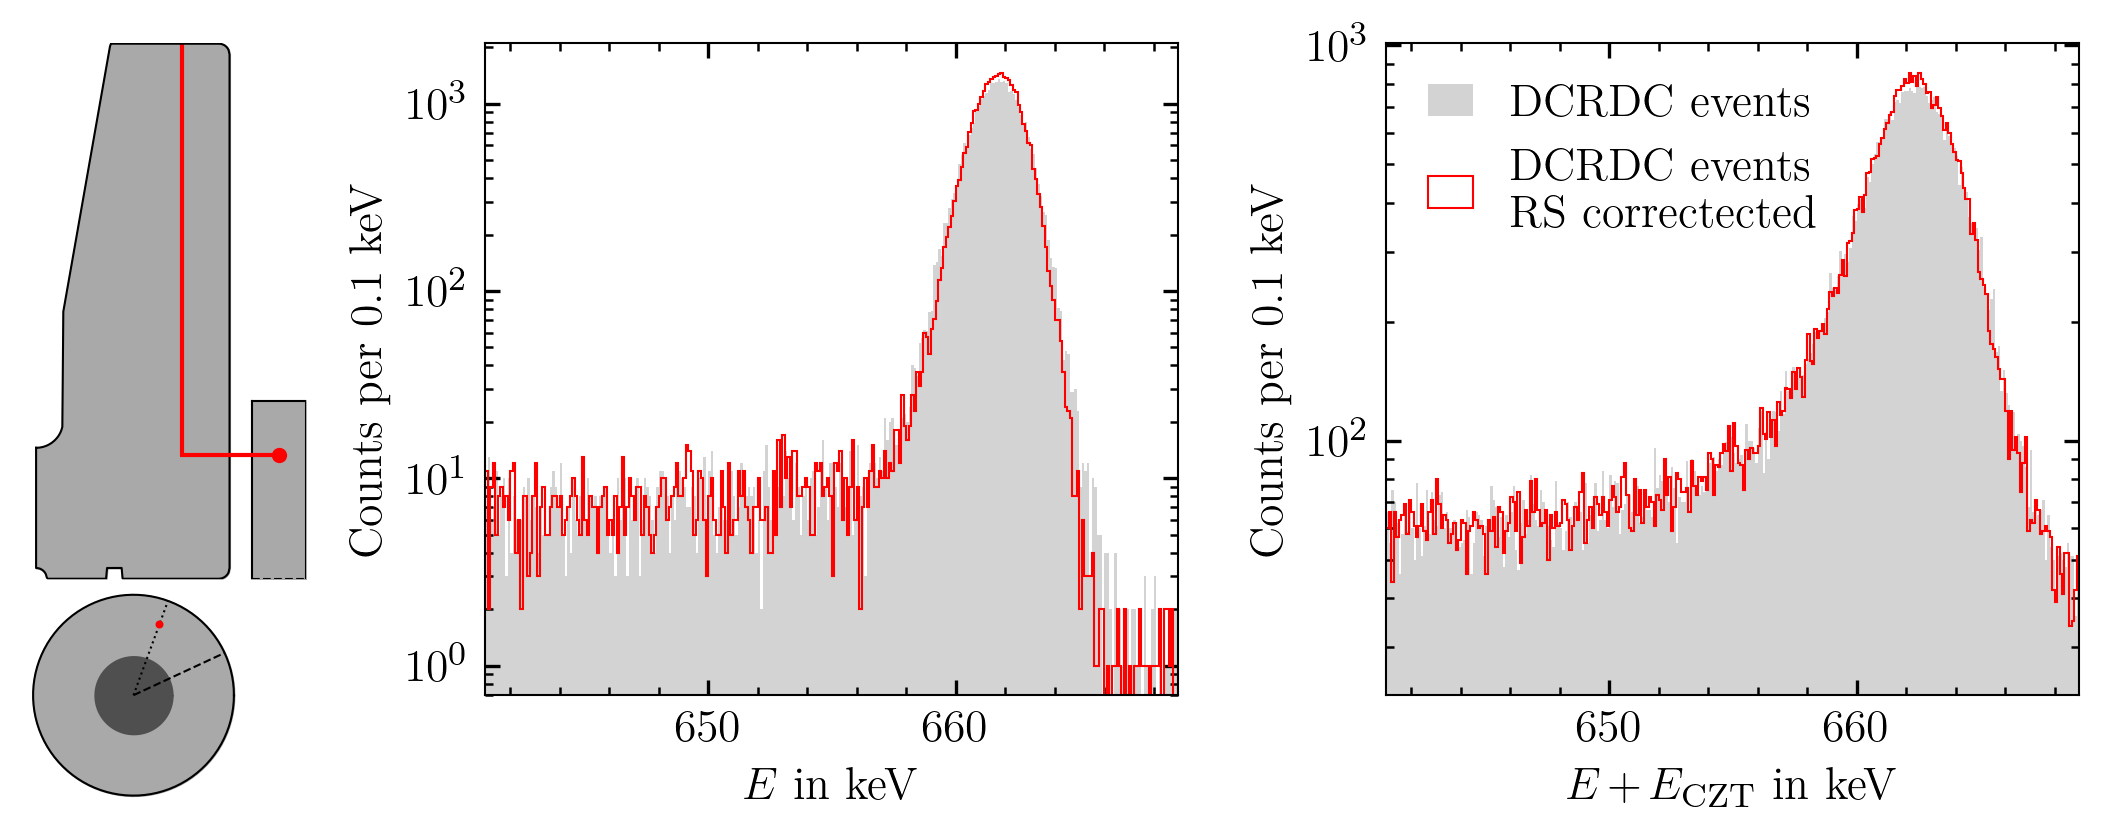

In [60]:
fontsize = 12
width = 6.9

fig = plt.figure()
gs = fig.add_gridspec(1, 2,  width_ratios=(1, 1),
                      left=0.22, right=0.99, bottom=0.15, top=0.99,
                      wspace=0.3)
ax = fig.add_subplot(gs[0, 1])

ax.hist(cal_energy.(icdcosp.euncal), bins = e_bins, color = :lightgrey, label = "DCRDC events")
ax.hist(ecorrdco2, bins = e_bins, color = :red, histtype = "step", label = "DCRDC events")
ax.set_yscale("log")
#ax.set_ylim(0.5,5e3)
ax.set_xlim(641,669)

ax.set_ylabel("Counts per 0.1 keV")
ax.set_xlabel(L"$E$ in keV")

ax2 = fig.add_subplot(gs[0, 0])
ax2.hist(cal_energy.(icdcosp.euncal) + ustrip(sum.(czsp.hit_edep))/1000, 
    bins = e_bins, color = :lightgrey, label = "DCRDC events")
ax2.hist(ecorrdco2 + ustrip(sum.(czsp.hit_edep))/1000, 
    bins = e_bins, color = :red, histtype = "step", label = "DCRDC events\nRS correctected")
ax2.set_yscale("log")
ax2.set_xlim(641,669)
#ax2.set_ylim(0.5,5e3)
ax2.set_ylabel("Counts per 0.1 keV")
ax2.set_xlabel(L"$E + E_\text{CZT}$ in keV")

axd = fig.add_axes((0.0, 0.3, 0.135, 0.69))
pyplot_icpc_czt(axd, 82-55, 25)

axd2 = fig.add_axes((0.0, 0.0, 0.1, 0.3), projection = "polar")
pyplot_icpc_top_view(axd2, [82-55], [69.9])

ax2.legend(loc = "upper left")
#ax2.legend(loc = "upper left")

fig.set_size_inches(width, 1.5*width/4)

fig.savefig("soft_pileup_e_corr_compton.png", dpi = 500, transparent = false)
fig.savefig("soft_pileup_e_corr_compton.pdf")

In [55]:
dtshift = (ic.dt - 0.3*ic.euncal)/1000;

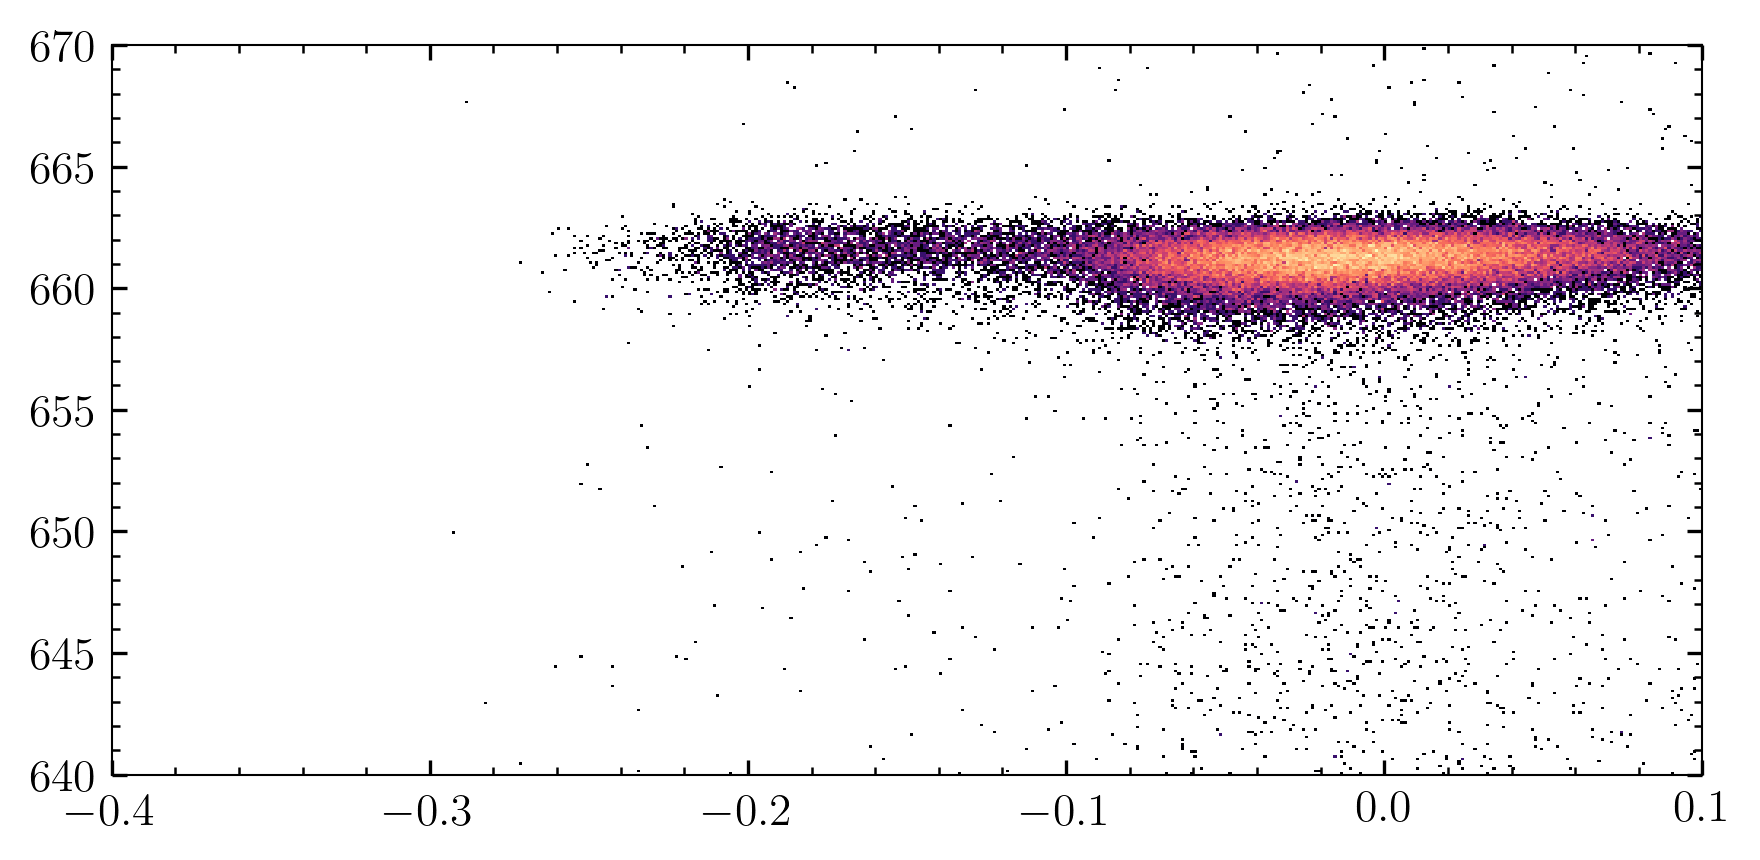

In [56]:
fig, ax = plt.subplots()
plt.hist2d(dtshift, cal_energy.(ic.euncal),bins = (-0.4:0.001:0.1, 640:0.1:670), norm=mpl.colors.LogNorm(), cmap = :magma)
fig.set_size_inches(6,3)

In [428]:
fwhm_dt = []
fwhm_fit_dt = []
convs_dt = []
μs_fit_dt = []
γs_dt = []
tailamps_dt = []
max_h_dt = []
#tau_ct = collect(700:10:1000)
dtcoeff = collect(-3:0.1:2.5)
X = []
Y = []

Xfit = []
Yfit = []

fit_e = true
fit_e_param = []

for dc in dtcoeff
    edt = cal_energy.(ic.euncal .+ dc*dtshift)
    
    ht = fit(Histogram, edt, e_bins)
    xt = collect(ht.edges[1])[1:end-1] .+ step_e_bins/2
        yt = ht.weights/(sum(ht.weights)*step_e_bins)
        push!(max_h_dt, maximum(ht.weights))
    
    if fit_e
        efitdt = curve_fit(fitfunc, xt, yt, [0.7, 1.0, 661.0, 2.0, 0.0, 0.01], 
                lower = [0.01, 0.0, 600.0, 0.0, 0.0, 0.0], upper = [1.0,6.0, 670.0, 100.0, 1.0, 0.1])
        x = collect(e_bins[1]:0.001:e_bins[end])
        
        y = fitfunc(x, efitdt.param)
        push!(fwhm_fit_dt, FWHM(x, y))
        push!(convs_dt, efitdt.converged)
        push!(μs_fit_dt, efitdt.param[3])
        push!(γs_dt, efitdt.param[4])
        push!(tailamps_dt, efitdt.param[5])
        push!(fit_e_param, efitdt.param)
        push!(Xfit, x)
        push!(Yfit, y)
    end
    
    push!(X, xt)
    push!(Y, yt)
end

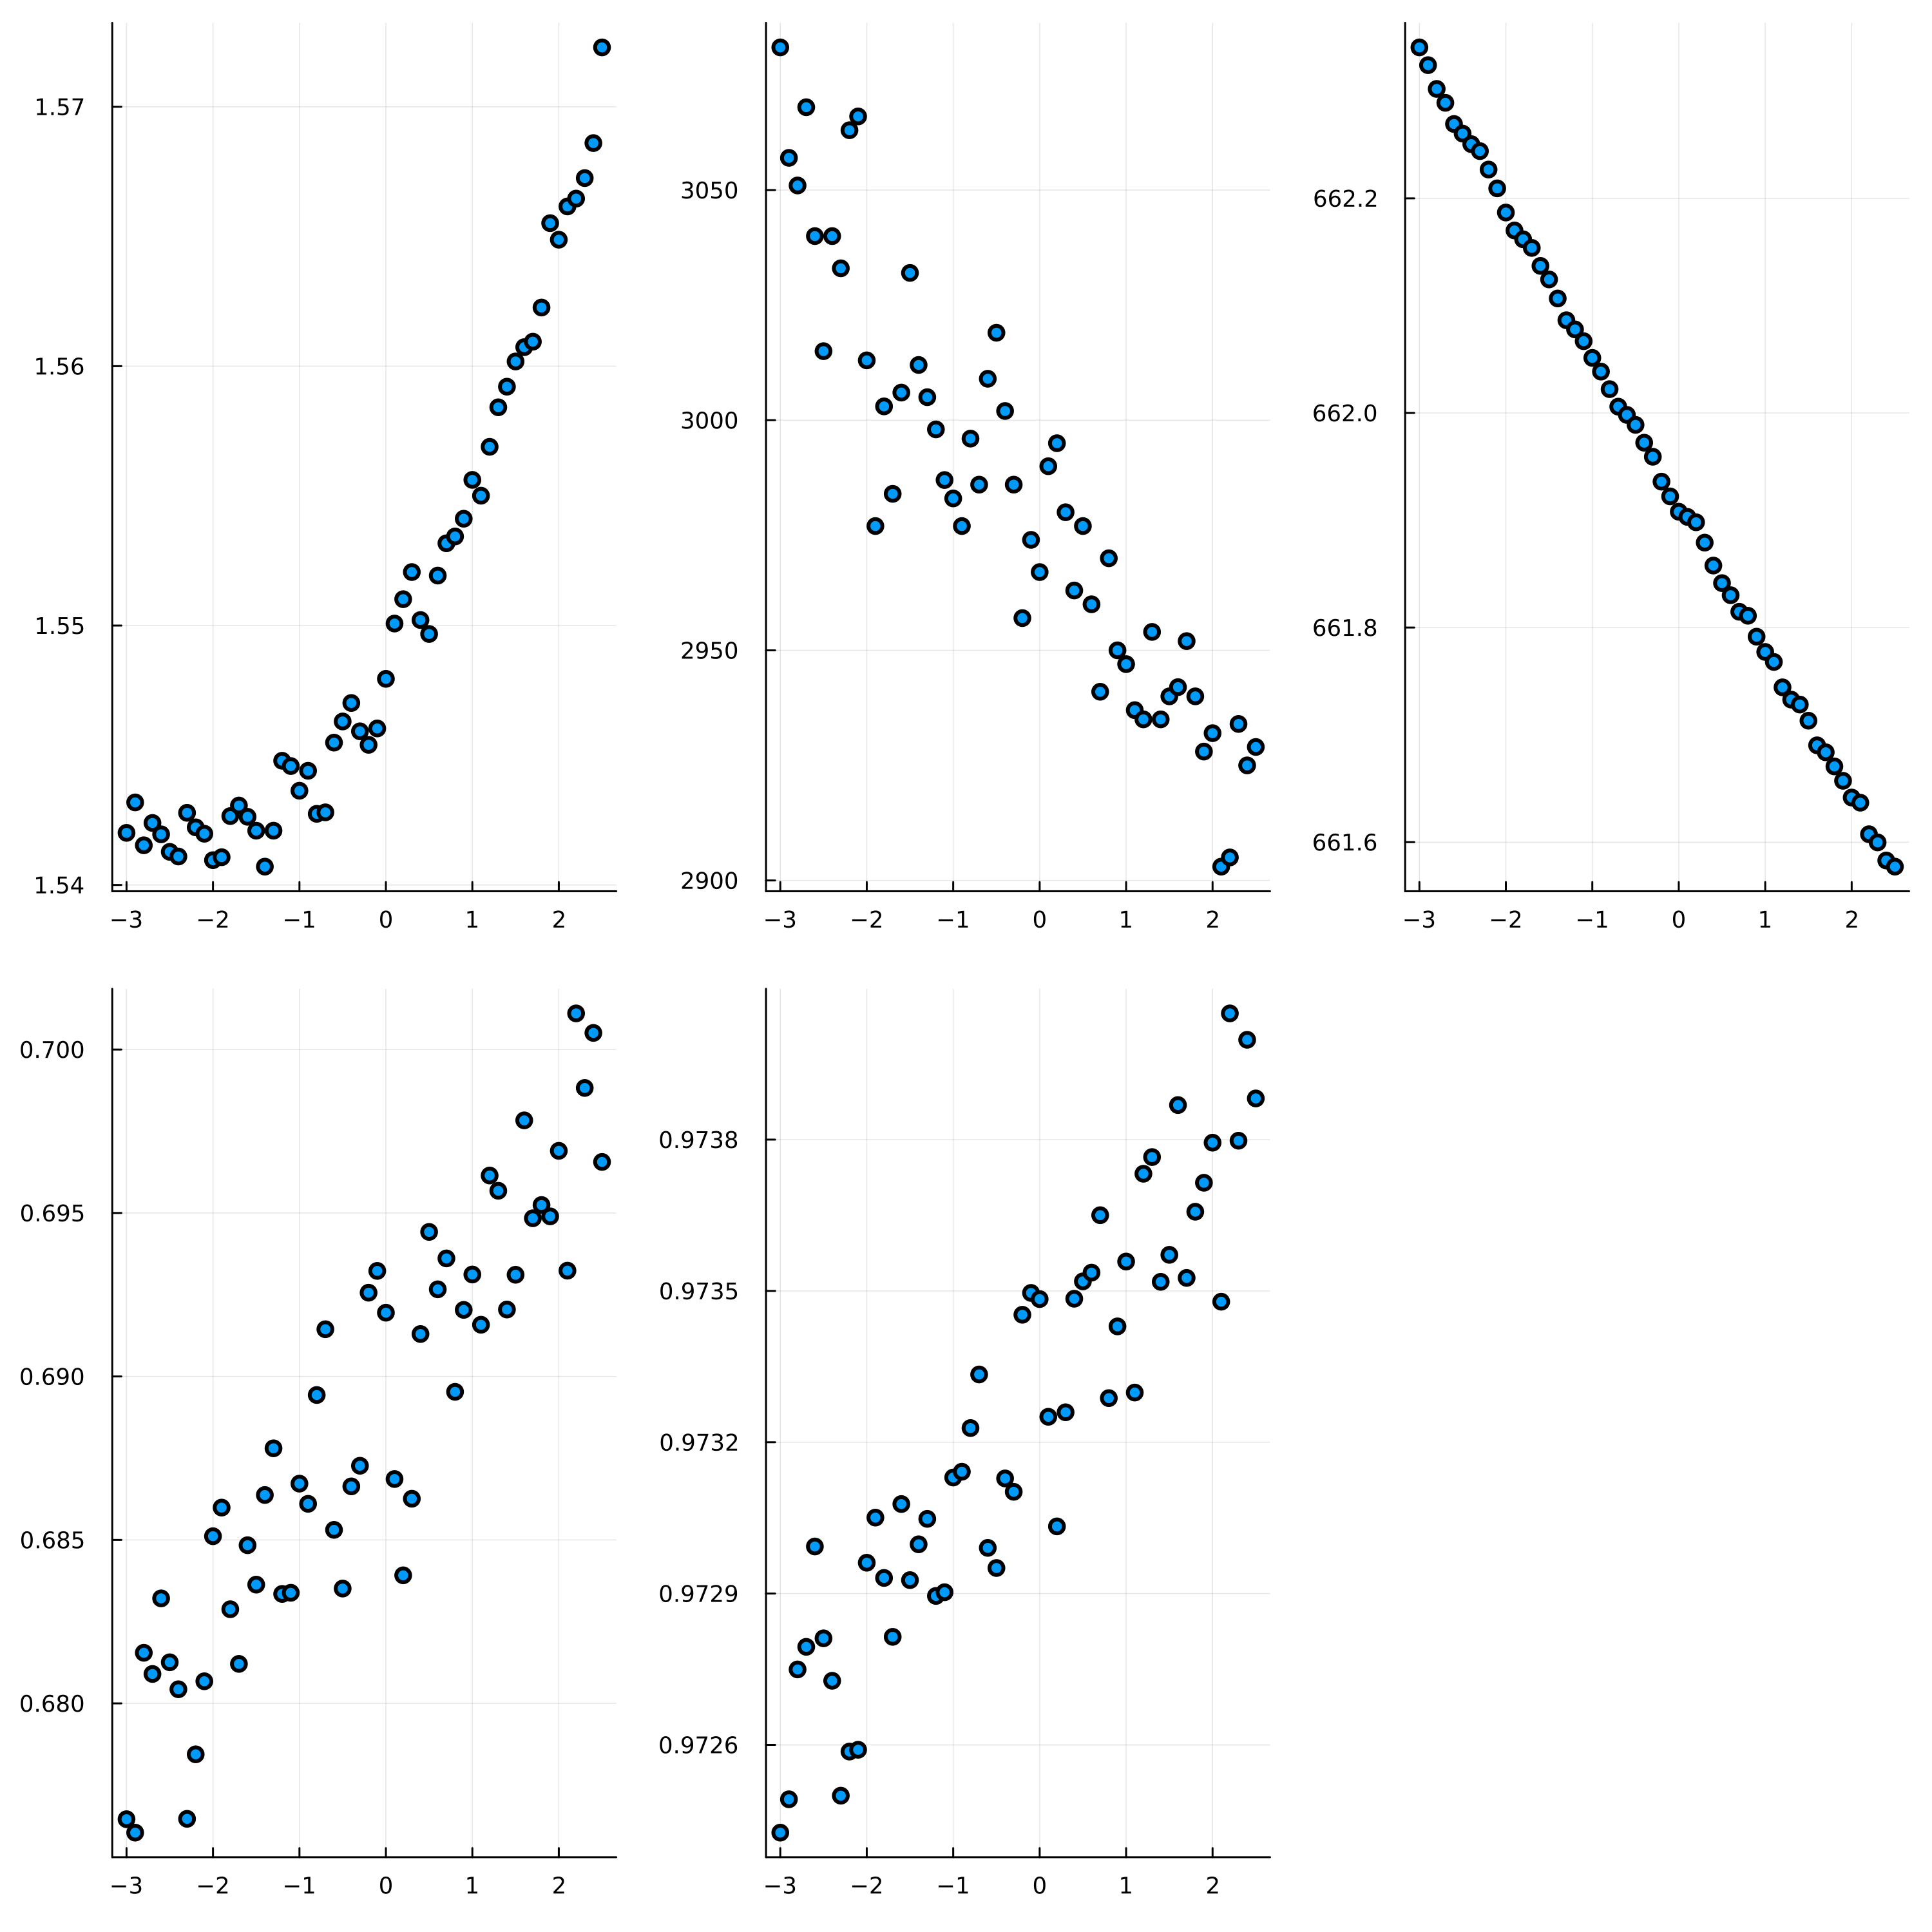

In [429]:
plot(scatter(dtcoeff, fwhm_fit_dt), 
    scatter(dtcoeff, max_h_dt), 
    scatter(dtcoeff, μs_fit_dt),
    scatter(dtcoeff, γs_dt),
    scatter(dtcoeff, tailamps_dt), 
    layout = (2,3), size = (1000,1000))